## Analyze: n attempts by cohort

Question: how many attempted cpokes are there in the gnp phases for v1 and v2 animals?

Known: v1 animals do more trials (since valid and non-valid are counted), but v1 and v2 animals have the same number of rewarded (valid) trials

Hypothesis: v2 animals have more attempted c-pokes (ie more non-rewarded cpokes) than v1 animals


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pandas as pd

import sys
sys.path.append('/Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/_active_experiments/FixationGrower')
meetings_path = "/Users/jessbreda/Desktop/github/jbreda_animal_training/notebooks/meetings"
if meetings_path not in sys.path:
    sys.path.append(meetings_path)
import config_alpha_experiment as alpha_config

import behav_viz.visualize as viz
import behav_viz.utils as utils
from behav_viz.utils import plot_utils as pu
from TCM_mtg_2024_09_05_FixationExperiment import *
FIGURES_PATH = utils.dir_utils.get_figures_path("rats", "alpha")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

DATA_PATH = "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/meetings/2024_12_LabMeeting/"


[2025-01-20 15:40:01,152][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2025-01-20 15:40:02,441][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


## 0. Load Data


In [2]:
tdf = pd.read_csv(DATA_PATH + "2024_12_lab_meeting_alpha_trials.csv", low_memory=False)

## 1. Compute Attempted Trials w/ Fix Delta


1. Plot attempted cpokes by session delta fix dur with total trials and valid trials

- get fix delta df
- get n settling ins and unravel
- plot


In [3]:
fix_delta_df = viz.FixationGrower.df_preperation.make_fixation_delta_df(tdf)
fix_delta_df = fix_delta_df.query("stage < 8").copy()
fix_delta_df.head(20)

date animal_id  stage  days_relative_to_stage_5 fix_experiment  \
0   2024-07-30      R041    5.0                         0             V2   
1   2024-07-30      R042    5.0                         0             V1   
2   2024-07-30      R043    5.0                         0             V2   
3   2024-07-30      R045    5.0                         0             V2   
4   2024-07-30      R046    5.0                         0             V1   
5   2024-07-31      R041    5.0                         1             V2   
6   2024-07-31      R042    6.0                         1             V1   
7   2024-07-31      R043    6.0                         1             V2   
8   2024-07-31      R045    6.0                         1             V2   
9   2024-07-31      R046    6.0                         1             V1   
10  2024-08-01      R040    5.0                         0             V1   
11  2024-08-01      R041    6.0                         2             V2   
12  2024-08-01      R042    7.0                         2             V1   
13  2024-08-01      R043    7.0                         2             V2   
14  2024-08-01      R044    5.0                         0             V1   
15  2024-08-01      R045    6.0                         2             V2   
16  2024-08-01      R046    7.0                         2             V1   
17  2024-08-01      R047    5.0                         0             V2   
18  2024-08-01      R052    5.0                         0             V1   
19  2024-08-02      R040    6.0                         1             V1   

    max_fixation_dur  trials  n_settling_ins  valid_trials  fixation_delta  
0           0.401000       5            91.0           5.0             NaN  
1           0.429000     580           581.0         420.0             NaN  
2           0.401000     519           773.0         517.0             NaN  
3           0.351000     355           584.0         354.0             NaN  
4           0.277000     355           355.0         268.0             NaN  
5           0.351000     218           492.0         218.0       -0.050000  
6           0.620000     456           465.0         311.0        0.191000  
7           0.631984     374           526.0         374.0        0.230984  
8           0.502783     241           362.0         241.0        0.151783  
9           0.358400     329           329.0         213.0        0.081400  
10          0.334000     440           440.0         325.0             NaN  
11          0.623660     158           368.0         158.0        0.272660  
12          0.781700     497           498.0         358.0        0.161700  
13          0.889493     398           561.0         398.0        0.257509  
14          0.015000       6             6.0           6.0             NaN  
15          0.654543     299           448.0         299.0        0.151760  
16          0.461050     306           307.0         204.0        0.102650  
17          0.401000     202           451.0         202.0             NaN  
18          0.251000     416           416.0         241.0             NaN  
19          0.558800     362           362.0         305.0        0.224800

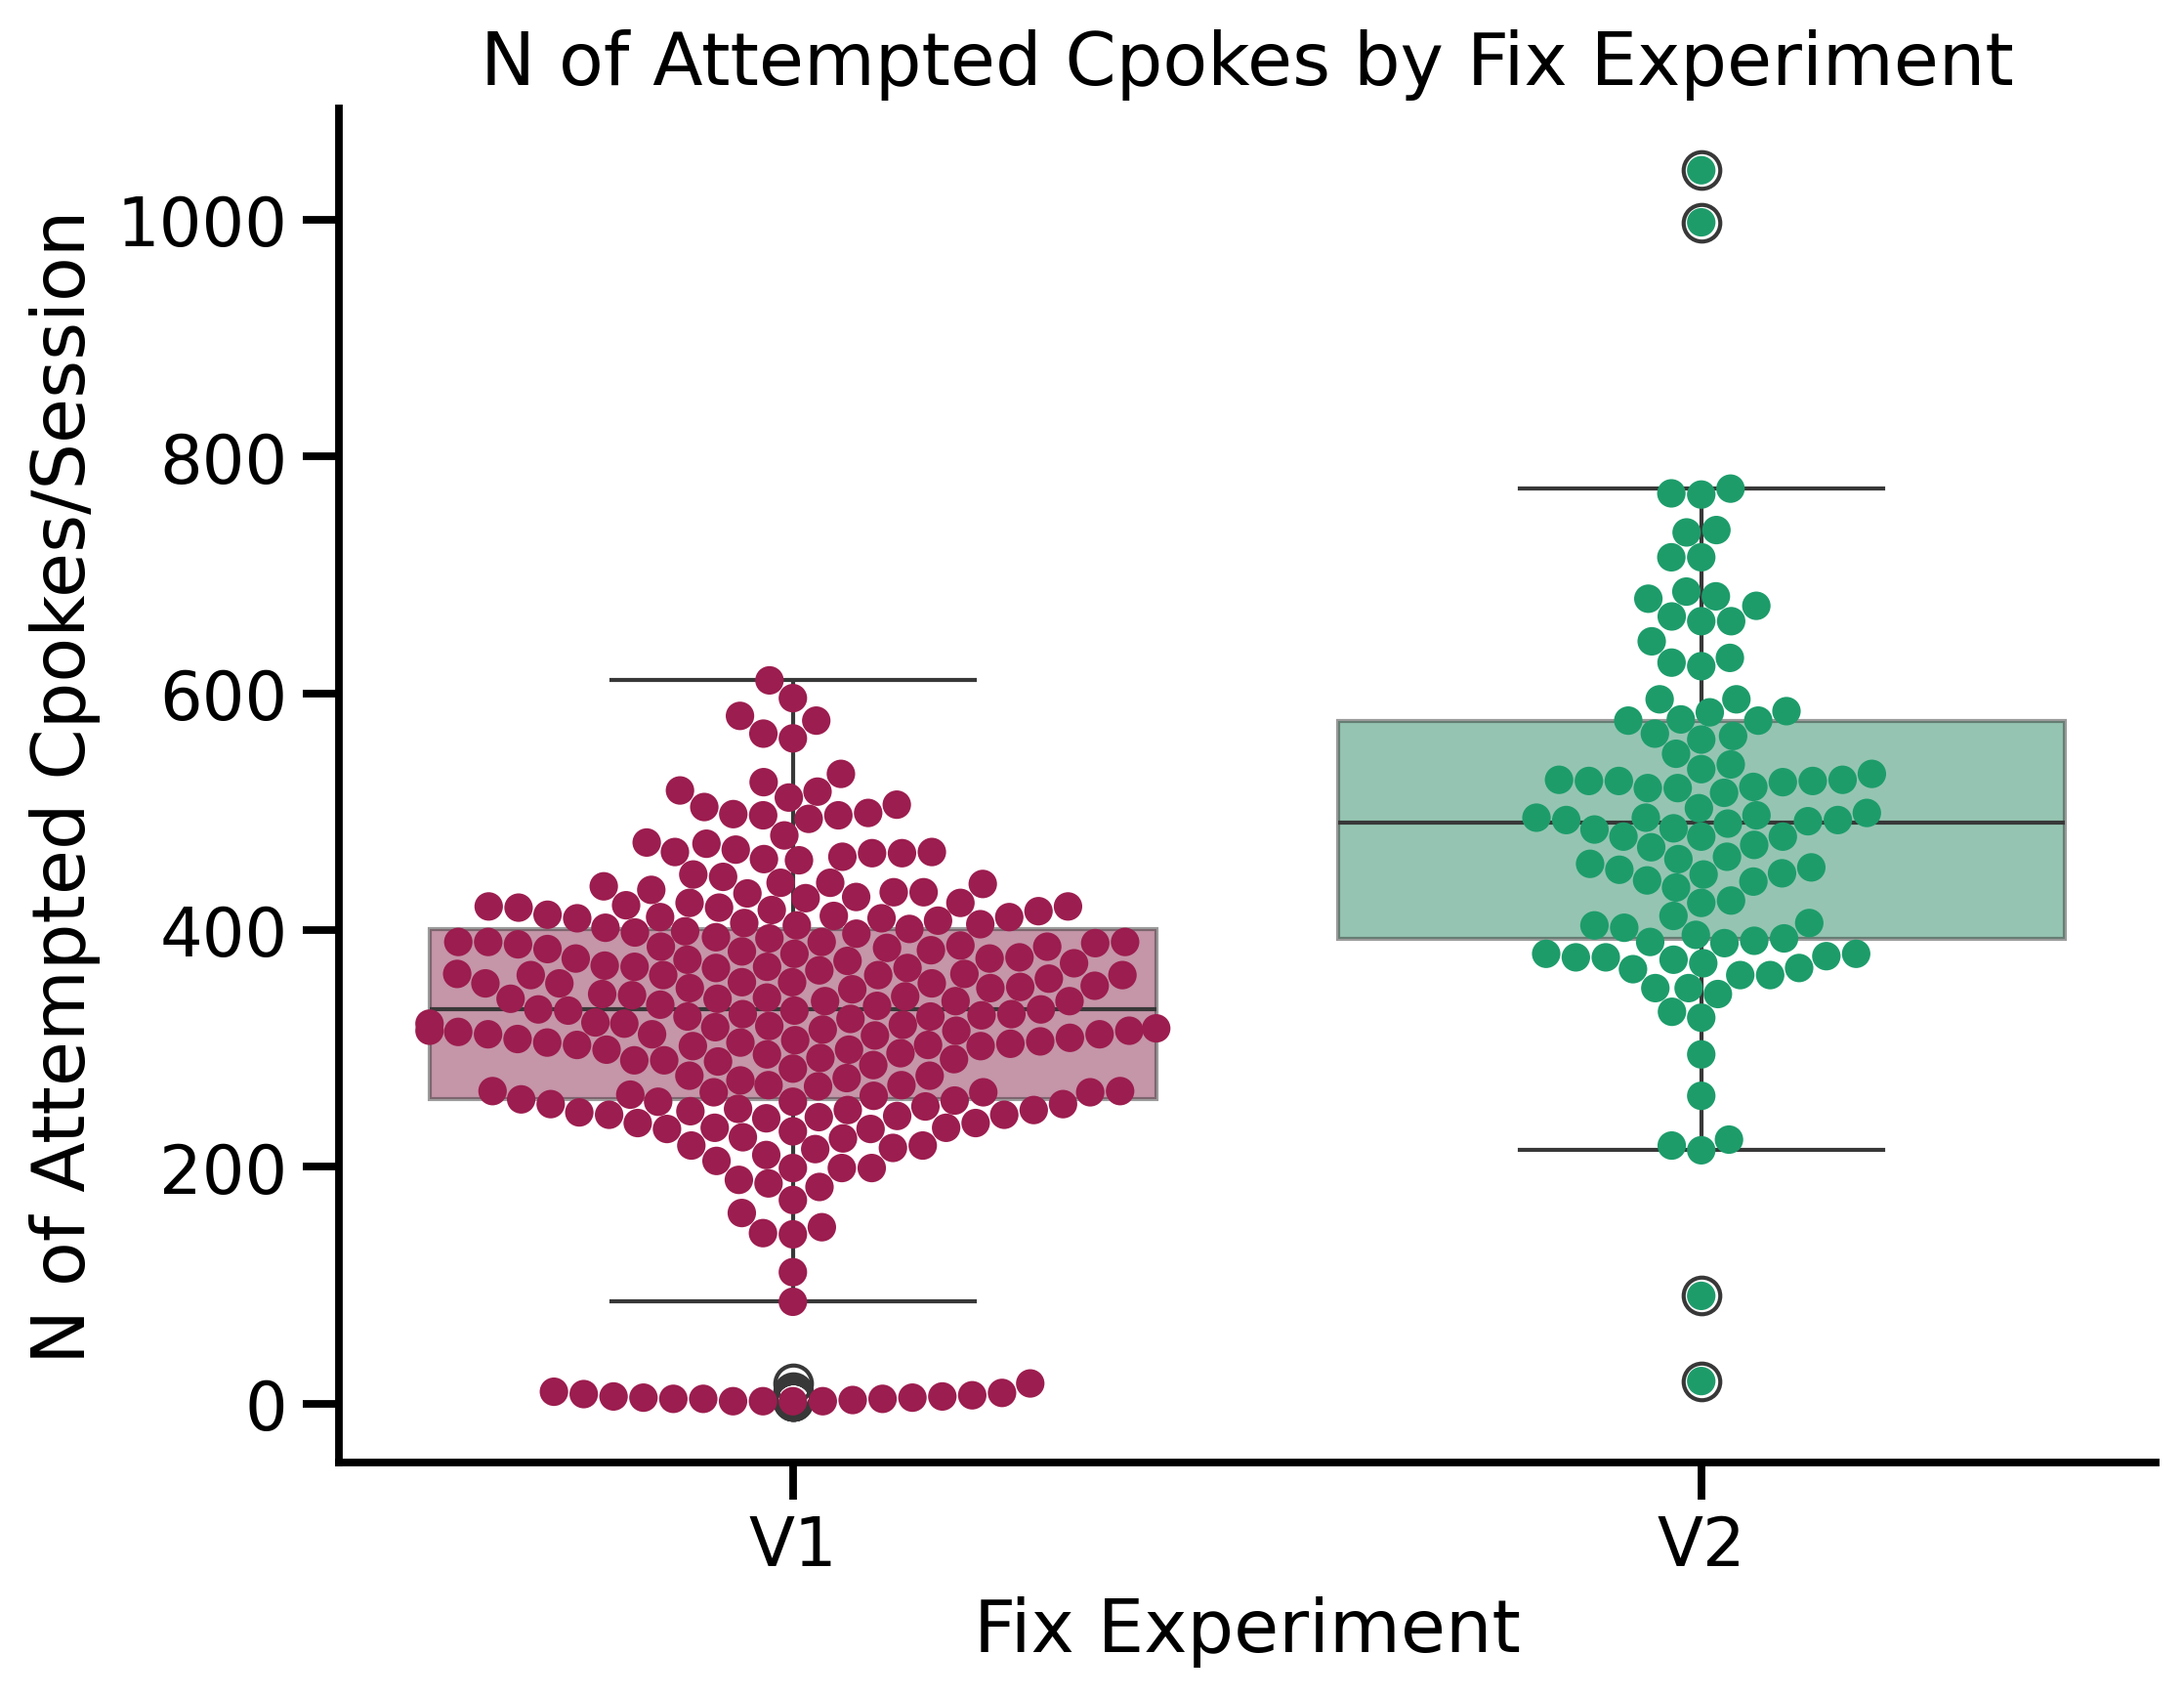

In [4]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# Boxplot
sns.boxplot(
    data=fix_delta_df,
    x="fix_experiment",
    y="n_settling_ins",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    dodge=False,
    ax=ax,
    boxprops=dict(alpha=0.5),
)

# Swarmplot
sns.swarmplot(
    data=fix_delta_df,
    x="fix_experiment",
    y="n_settling_ins",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    size=7,
)

# Set labels, title, and limits
ax.set(
    ylabel="N of Attempted Cpokes/Session",
    xlabel="Fix Experiment",
    title="N of Attempted Cpokes by Fix Experiment",
)

# Remove the extra legend if hue was used in both plots
if ax.get_legend():
    ax.legend_.remove()

sns.despine()

plt.show()

/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


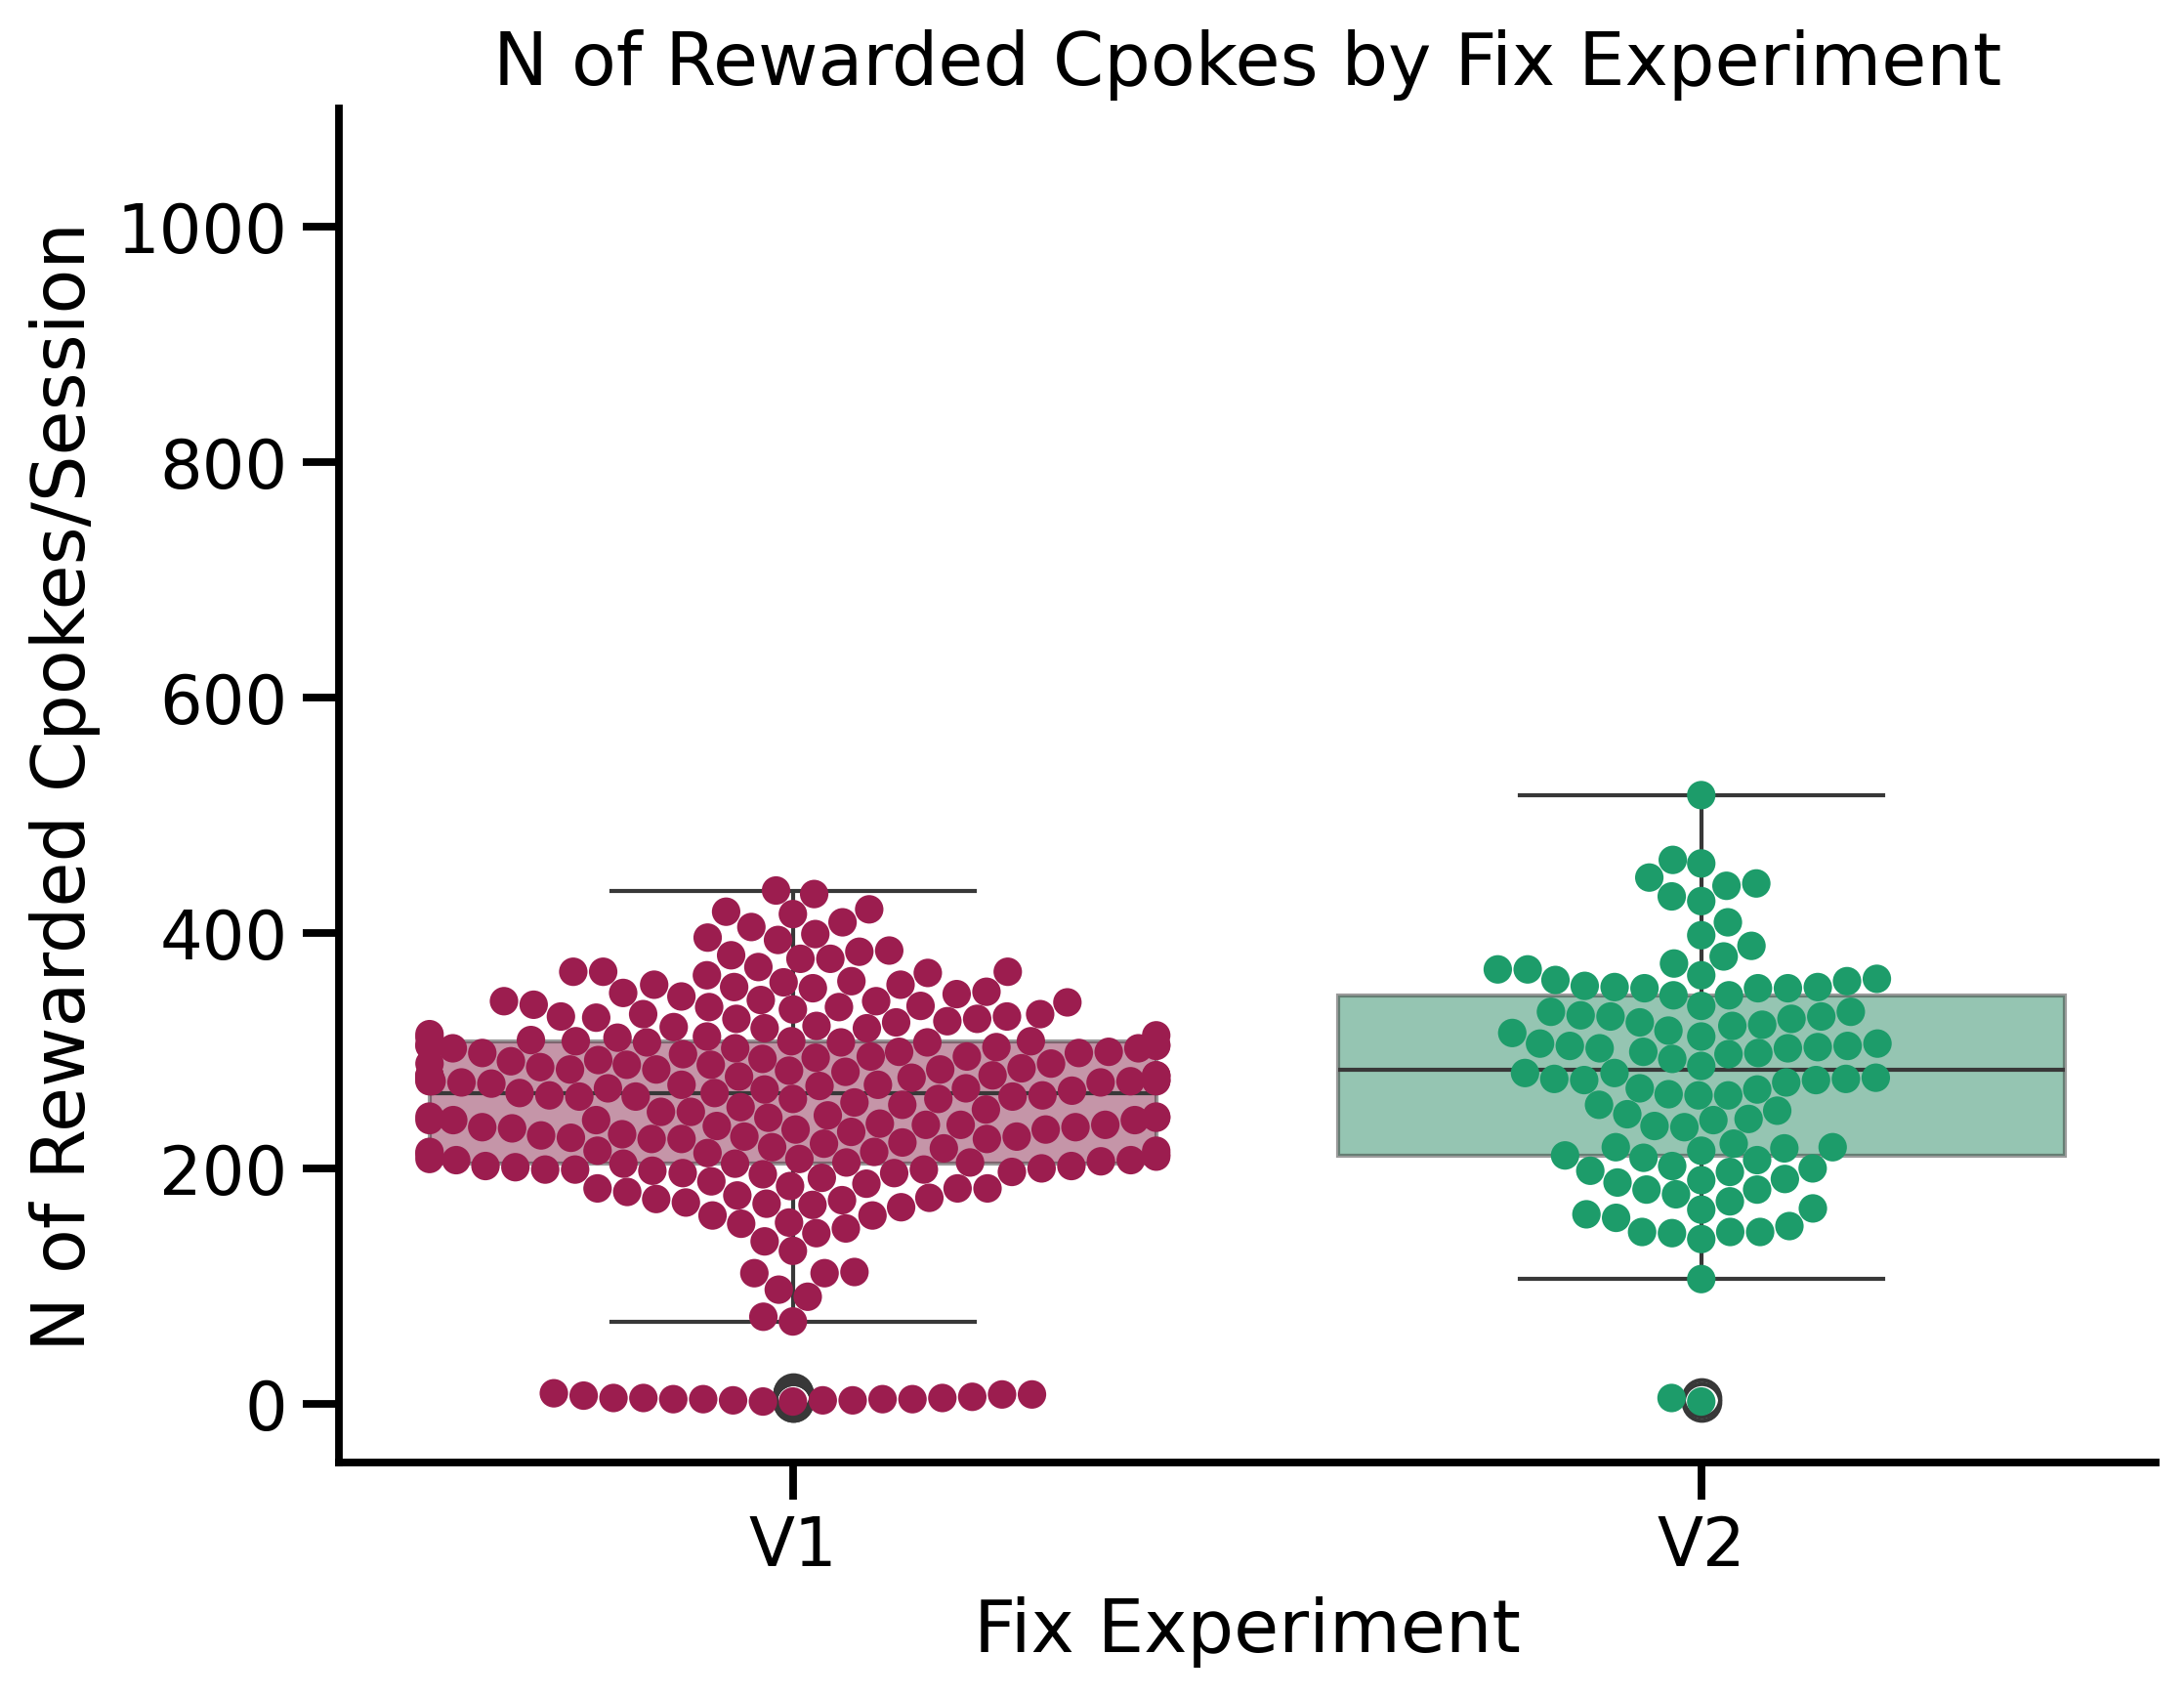

In [5]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# Boxplot
sns.boxplot(
    data=fix_delta_df,
    x="fix_experiment",
    y="valid_trials",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    dodge=False,
    ax=ax,
    boxprops=dict(alpha=0.5),
)

# Swarmplot
sns.swarmplot(
    data=fix_delta_df,
    x="fix_experiment",
    y="valid_trials",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    size=7,
)

# Set labels, title, and limits
ax.set(
    ylabel="N of Rewarded Cpokes/Session",
    xlabel="Fix Experiment",
    title="N of Rewarded Cpokes by Fix Experiment",
    ylim=(-50, 1100),
)

# Remove the extra legend if hue was used in both plots
if ax.get_legend():
    ax.legend_.remove()

sns.despine()

plt.show()

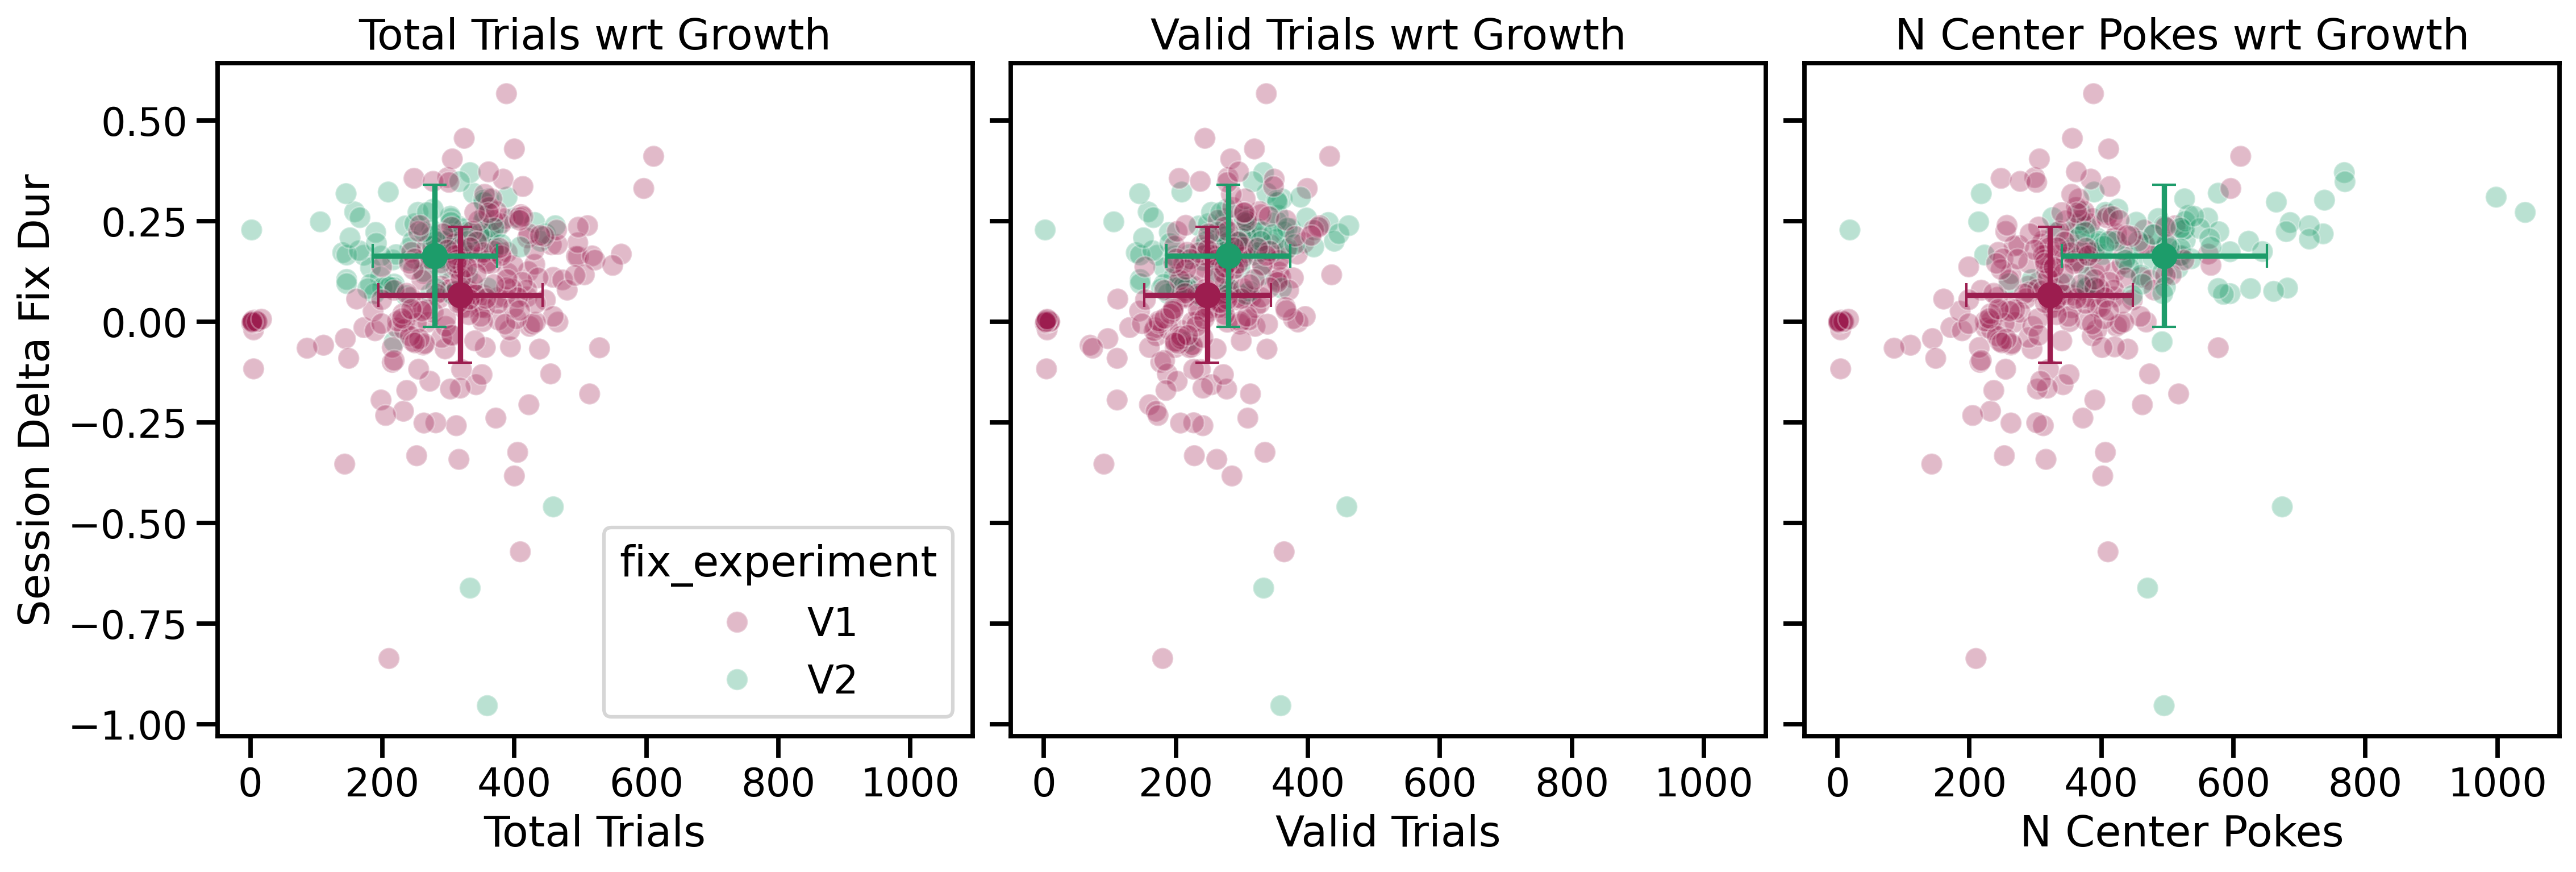

In [6]:
fig, ax = plt.subplots(
    1, 3, figsize=(15, 5), constrained_layout=True, dpi=300, sharex=True, sharey=True
)

# Plot individual points and means for total trials
sns.scatterplot(
    fix_delta_df,
    x="trials",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    alpha=0.3,
    ax=ax[0],
)

# Calculate and plot means for total trials
means = (
    fix_delta_df.groupby("fix_experiment")
    .agg({"trials": ["mean", "std"], "fixation_delta": ["mean", "std"]})
    .reset_index()
)

for i, exp in enumerate(["V1", "V2"]):
    exp_data = means[means["fix_experiment"] == exp]
    ax[0].errorbar(
        exp_data[("trials", "mean")].values[0],
        exp_data[("fixation_delta", "mean")].values[0],
        xerr=exp_data[("trials", "std")].values[0],
        yerr=exp_data[("fixation_delta", "std")].values[0],
        fmt="o",
        markersize=10,
        capsize=5,
        color=pu.ALPHA_PALLETTE[i],
    )

_ = ax[0].set(
    ylabel="Session Delta Fix Dur",
    xlabel="Total Trials",
    title="Total Trials wrt Growth",
)

# Plot individual points and means for valid trials
sns.scatterplot(
    fix_delta_df,
    x="valid_trials",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    alpha=0.3,
    ax=ax[1],
    legend=False,
)

# Calculate and plot means for valid trials
means = (
    fix_delta_df.groupby("fix_experiment")
    .agg({"valid_trials": ["mean", "std"], "fixation_delta": ["mean", "std"]})
    .reset_index()
)

for i, exp in enumerate(["V1", "V2"]):
    exp_data = means[means["fix_experiment"] == exp]
    ax[1].errorbar(
        exp_data[("valid_trials", "mean")].values[0],
        exp_data[("fixation_delta", "mean")].values[0],
        xerr=exp_data[("valid_trials", "std")].values[0],
        yerr=exp_data[("fixation_delta", "std")].values[0],
        fmt="o",
        markersize=10,
        capsize=5,
        color=pu.ALPHA_PALLETTE[i],
    )

_ = ax[1].set(
    ylabel="Session Delta Fix Dur",
    xlabel="Valid Trials",
    title="Valid Trials wrt Growth",
)

# Plot individual points and means for settling ins
sns.scatterplot(
    fix_delta_df,
    x="n_settling_ins",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    alpha=0.3,
    ax=ax[2],
    legend=False,
)

# Calculate and plot means for settling ins
means = (
    fix_delta_df.groupby("fix_experiment")
    .agg({"n_settling_ins": ["mean", "std"], "fixation_delta": ["mean", "std"]})
    .reset_index()
)

for i, exp in enumerate(["V1", "V2"]):
    exp_data = means[means["fix_experiment"] == exp]
    ax[2].errorbar(
        exp_data[("n_settling_ins", "mean")].values[0],
        exp_data[("fixation_delta", "mean")].values[0],
        xerr=exp_data[("n_settling_ins", "std")].values[0],
        yerr=exp_data[("fixation_delta", "std")].values[0],
        fmt="o",
        markersize=10,
        capsize=5,
        color=pu.ALPHA_PALLETTE[i],
    )

_ = ax[2].set(
    ylabel="Session Delta Fix Dur",
    xlabel="N Center Pokes",
    title="N Center Pokes wrt Growth",
)

## 1.2 Compute Ratio of Rewarded (Valid) To Attempted Trials


In [7]:
fix_delta_df["ratio_rewarded_to_attempted"] = (
    fix_delta_df["valid_trials"] / fix_delta_df["n_settling_ins"]
)

In [8]:
fix_delta_df = fix_delta_df.query("ratio_rewarded_to_attempted < = 1")

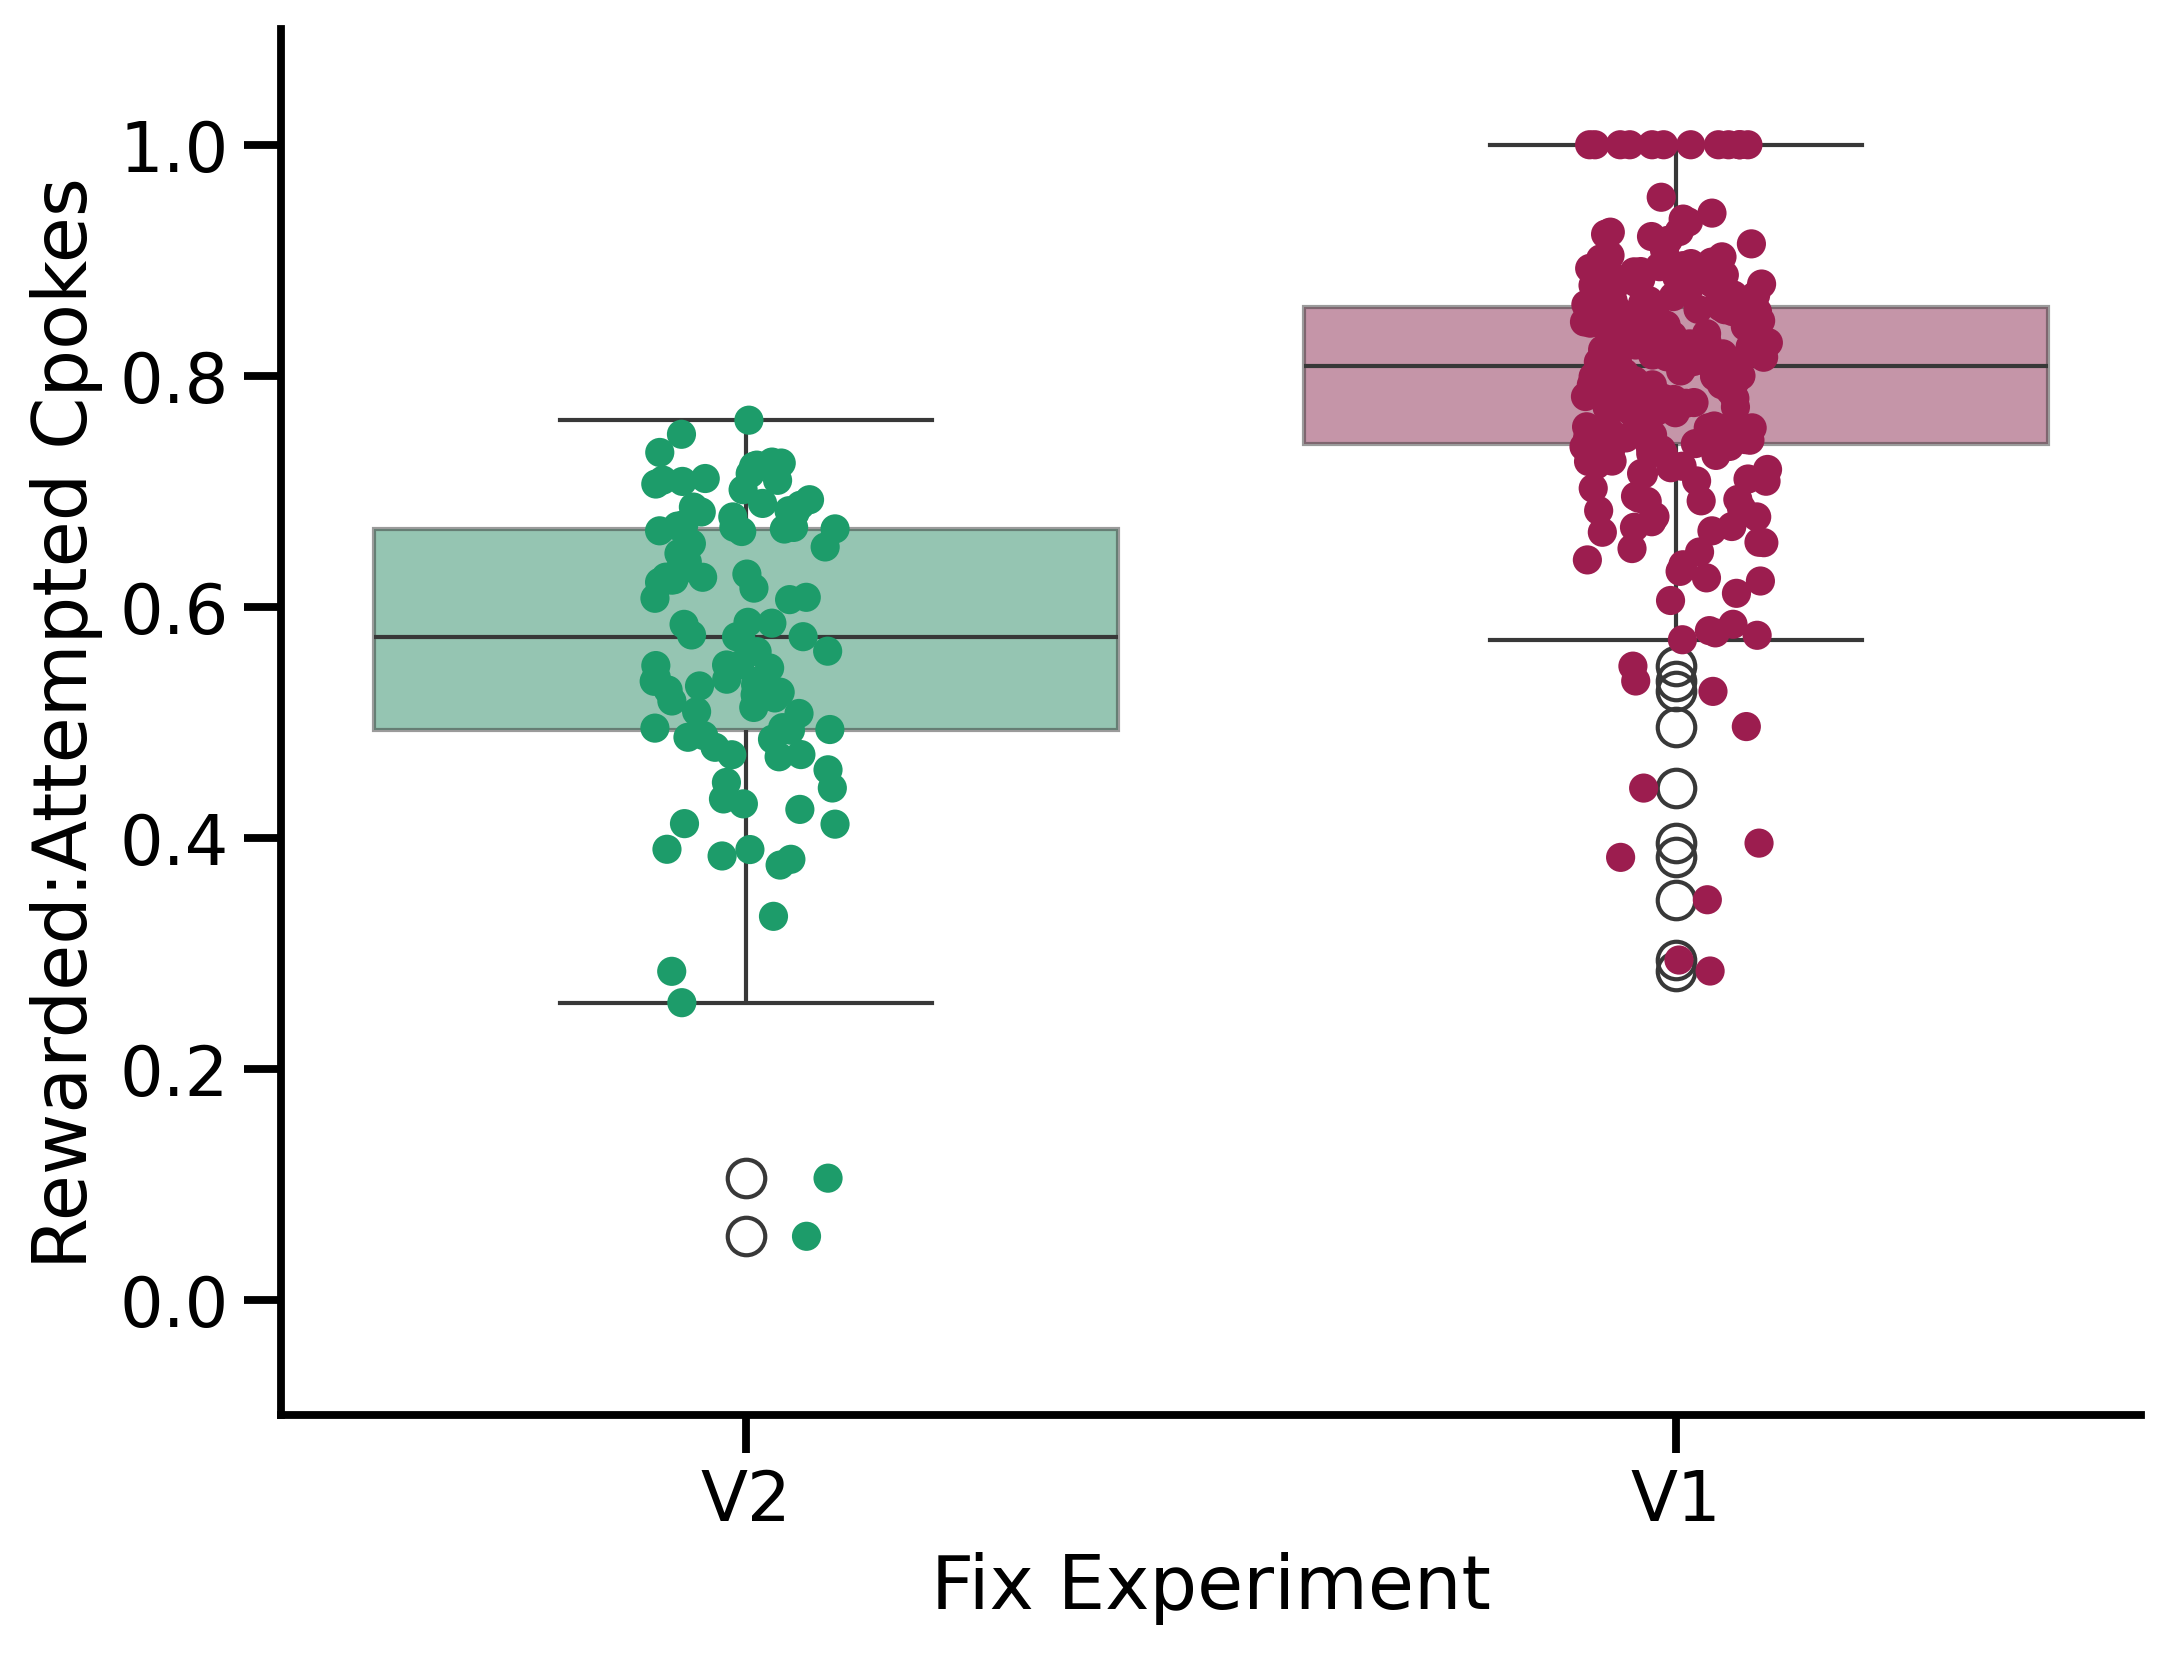

In [9]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# Boxplot
sns.boxplot(
    data=fix_delta_df,
    x="fix_experiment",
    y="ratio_rewarded_to_attempted",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    dodge=False,
    ax=ax,
    boxprops=dict(alpha=0.5),
)

# Swarmplot
sns.stripplot(
    data=fix_delta_df,
    x="fix_experiment",
    y="ratio_rewarded_to_attempted",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    size=7,
)

# Set labels, title, and limits
ax.set(
    ylabel="Rewarded:Attempted Cpokes",
    xlabel="Fix Experiment",
    # title="Ratio of Rewarded to Attempted Cpokes",
    ylim=(-0.1, 1.1),
)

# Remove the extra legend if hue was used in both plots
if ax.get_legend():
    ax.legend_.remove()

sns.despine()

plt.show()

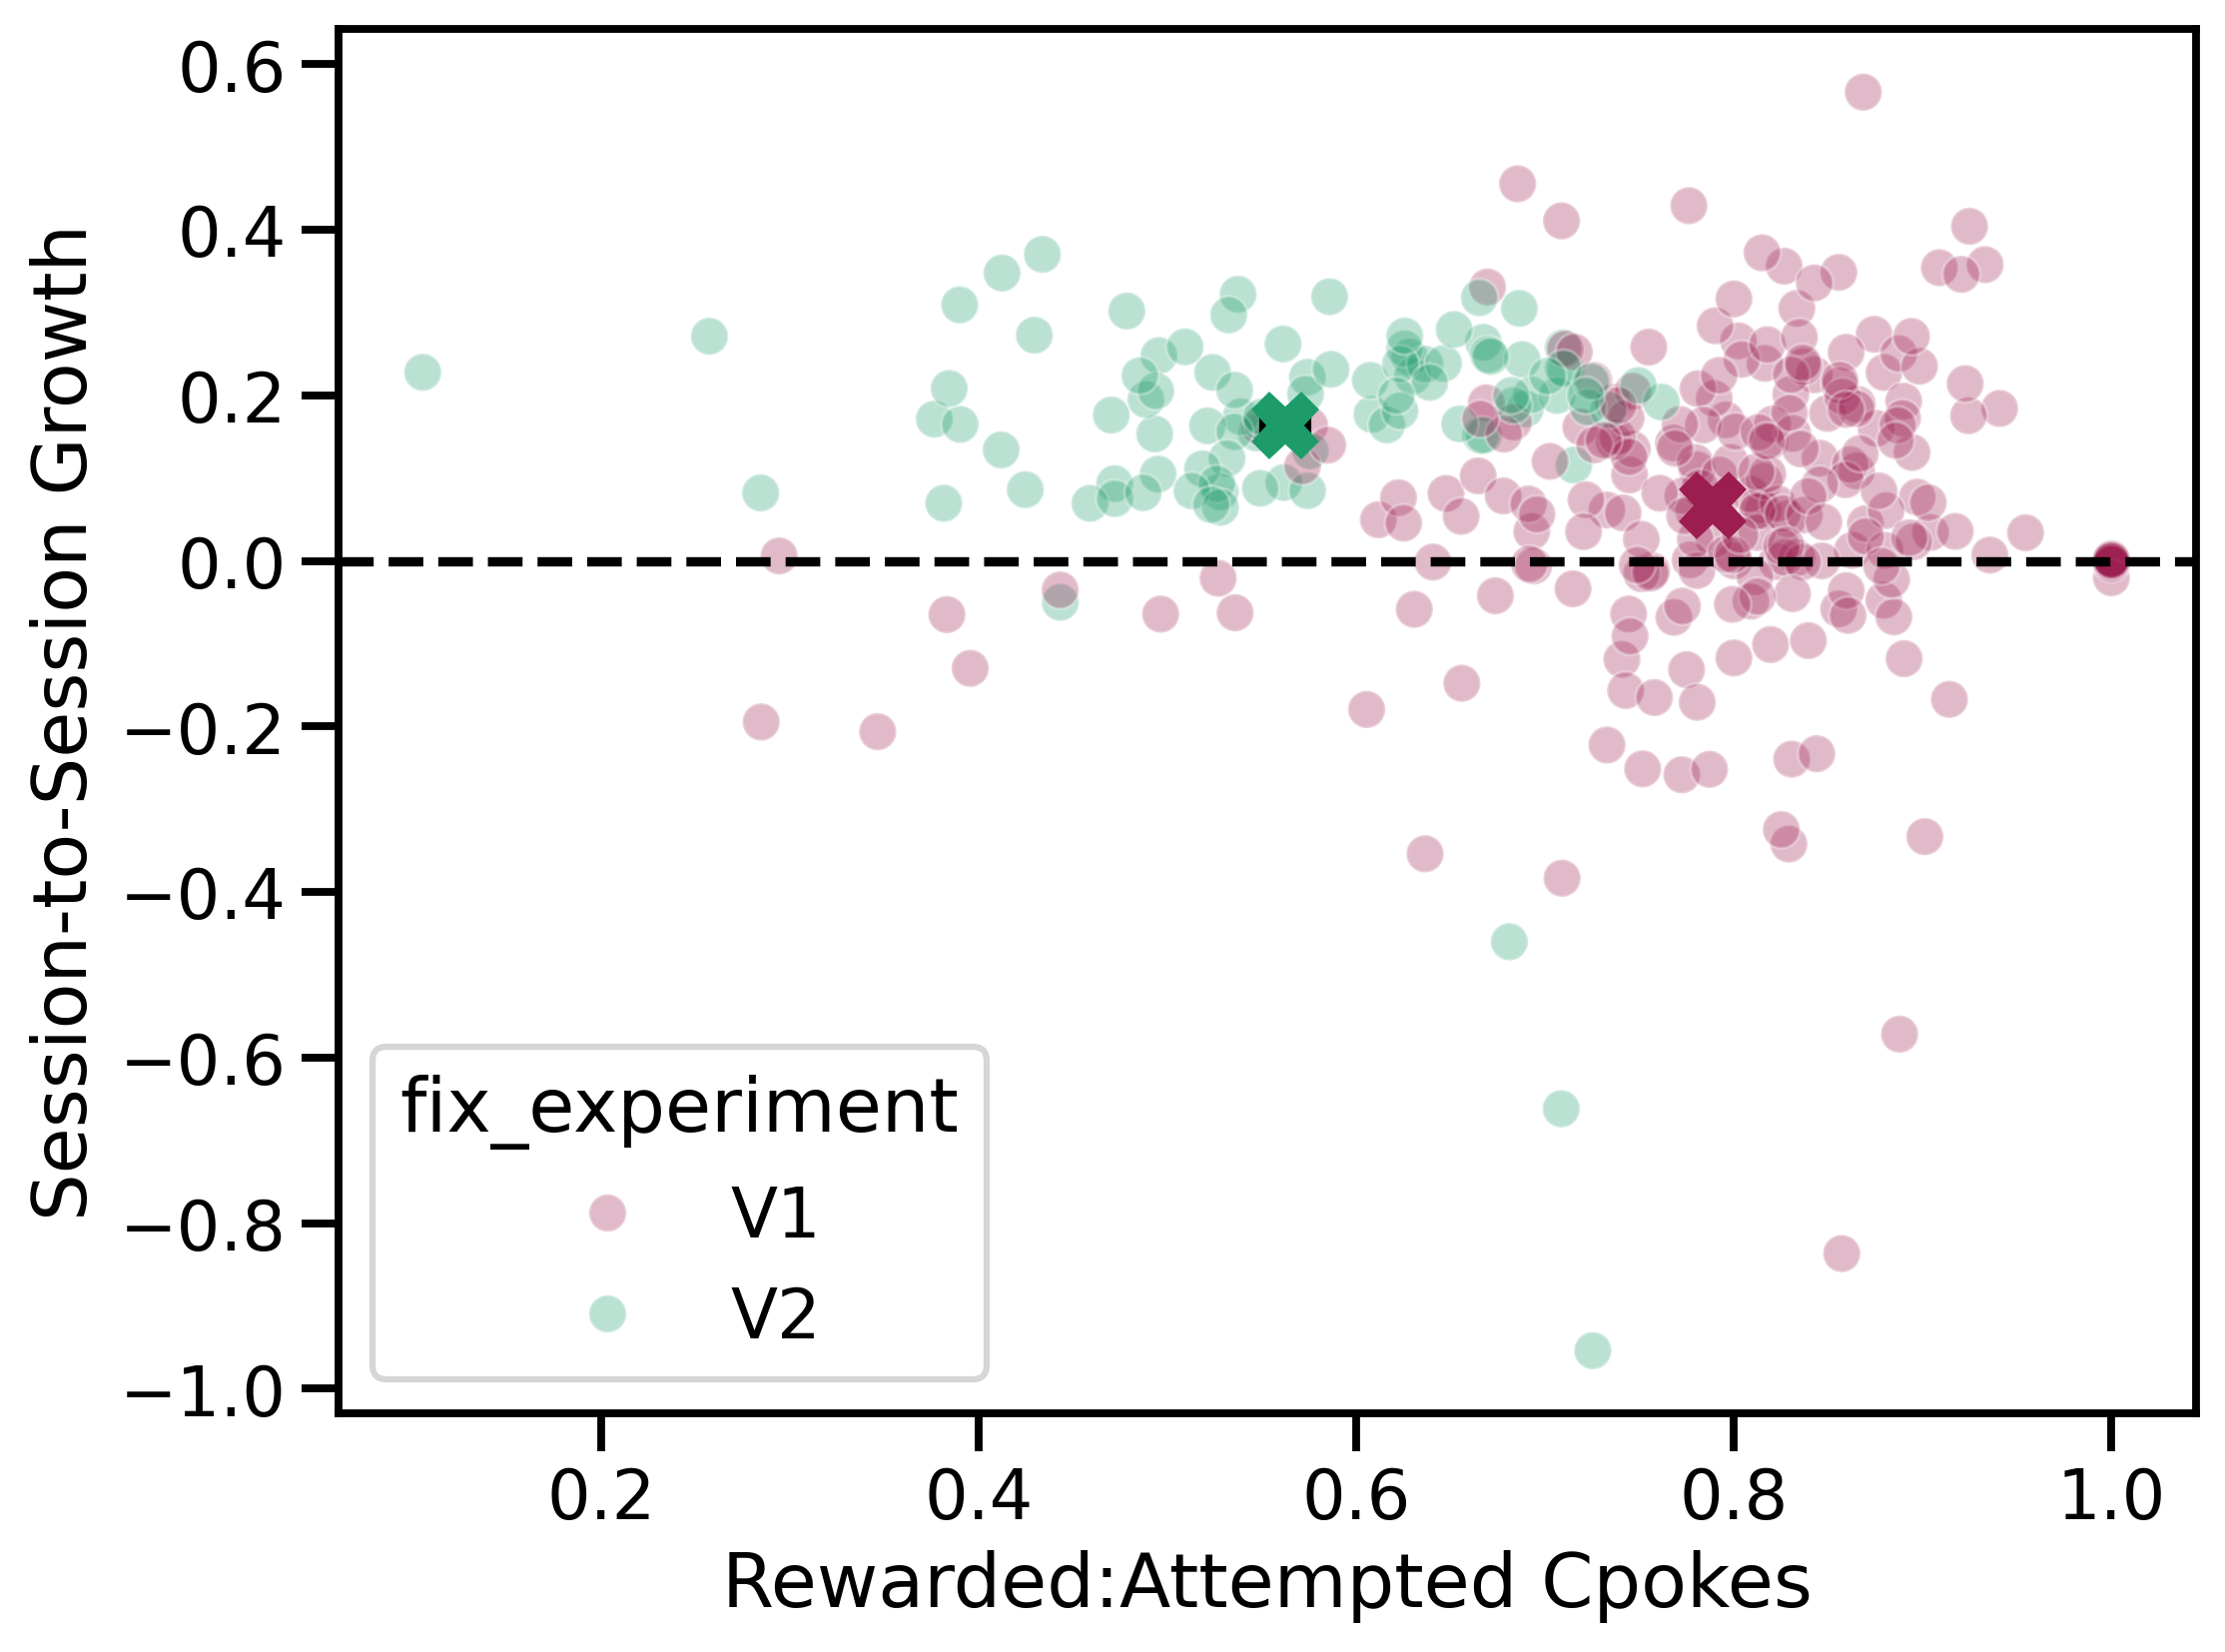

In [10]:
# scatter plot of ratio of rewarded to attempted trials vs total trials
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
sns.scatterplot(
    fix_delta_df,
    x="ratio_rewarded_to_attempted",
    y="fixation_delta",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    alpha=0.3,
)

means = (
    fix_delta_df.groupby("fix_experiment")
    .agg(
        {
            "ratio_rewarded_to_attempted": ["mean", "sem"],
            "fixation_delta": ["mean", "sem"],
        }
    )
    .reset_index()
)


for i, exp in enumerate(["V1", "V2"]):
    exp_data = means[means["fix_experiment"] == exp]
    ax.errorbar(
        exp_data[("ratio_rewarded_to_attempted", "mean")].values[0],
        exp_data[("fixation_delta", "mean")].values[0],
        xerr=exp_data[("ratio_rewarded_to_attempted", "sem")].values[0],
        yerr=exp_data[("fixation_delta", "sem")].values[0],
        markersize=15,
        capsize=5,
        marker="X",
        ecolor="k",
        color=pu.ALPHA_PALLETTE[i],
    )

ax.axhline(0, color="black", linestyle="--")

ax.set(
    ylabel="Session-to-Session Growth",
    xlabel="Rewarded:Attempted Cpokes",
    # title="Ratio of Rewarded to Attempted Cpokes",
)
plt.show()

### 1.2.1 Stats


In [11]:
# Compute subject-level means (could also use median)
subject_means = (
    fix_delta_df.groupby(["animal_id", "fix_experiment"], as_index=False)[
        "ratio_rewarded_to_attempted"
    ]
    .mean(numeric_only=True)
    .rename(columns={"ratio_rewarded_to_attempted": "ratio_mean"})
)

subject_means.head()

animal_id fix_experiment  ratio_mean
0      R040             V1    0.772597
1      R041             V2    0.413035
2      R042             V1    0.764708
3      R043             V2    0.658351
4      R044             V1    0.941379

In [12]:
import scipy.stats as stats

# Separate out the two groups
group_v1 = subject_means.loc[subject_means["fix_experiment"] == "V1", "ratio_mean"]
group_v2 = subject_means.loc[subject_means["fix_experiment"] == "V2", "ratio_mean"]

# Shapiro-Wilk
sw_v1 = stats.shapiro(group_v1)
sw_v2 = stats.shapiro(group_v2)
print("Shapiro-Wilk V1:", sw_v1)
print("Shapiro-Wilk V2:", sw_v2)

# (Small p-value means likely not normally distributed; large p-value means data are not inconsistent with normal.)

Shapiro-Wilk V1: ShapiroResult(statistic=np.float64(0.9343329864608223), pvalue=np.float64(0.5236637206269832))
Shapiro-Wilk V2: ShapiroResult(statistic=np.float64(0.9238948507955237), pvalue=np.float64(0.4254581123722648))


In [13]:
# Independent samples t-test
ttest_res = stats.ttest_ind(group_v1, group_v2, equal_var=False)
# using Welch's t-test by setting equal_var=False is more robust.

print("T-test (Welch) results:")
print(ttest_res)

T-test (Welch) results:
TtestResult(statistic=np.float64(6.519521680372962), pvalue=np.float64(7.241722799665106e-06), df=np.float64(15.920679506532789))


In [14]:
import statsmodels.formula.api as smf

# For a linear mixed-effects model, you can do:
model = smf.mixedlm(
    formula="ratio_rewarded_to_attempted ~ fix_experiment",  # fixed effects
    data=fix_delta_df,
    groups=fix_delta_df["animal_id"],  # random intercept for each animal
)
mixed_lm = model.fit()
print(mixed_lm.summary())

                  Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ratio_rewarded_to_attempted
No. Observations: 347     Method:             REML                       
No. Groups:       18      Scale:              0.0111                     
Min. group size:  7       Log-Likelihood:     265.3303                   
Max. group size:  57      Converged:          Yes                        
Mean group size:  19.3                                                   
---------------------------------------------------------------------------
                       Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
---------------------------------------------------------------------------
Intercept               0.800      0.025   32.366   0.000    0.752    0.848
fix_experiment[T.V2]   -0.235      0.036   -6.571   0.000   -0.305   -0.165
Group Var               0.005      0.020                                   



/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


## 2. Over Trials


[Text(0, 0.5, 'N of Attempted Cpokes'), Text(0.5, 0, 'Trial'), (0.0, 25.0)]

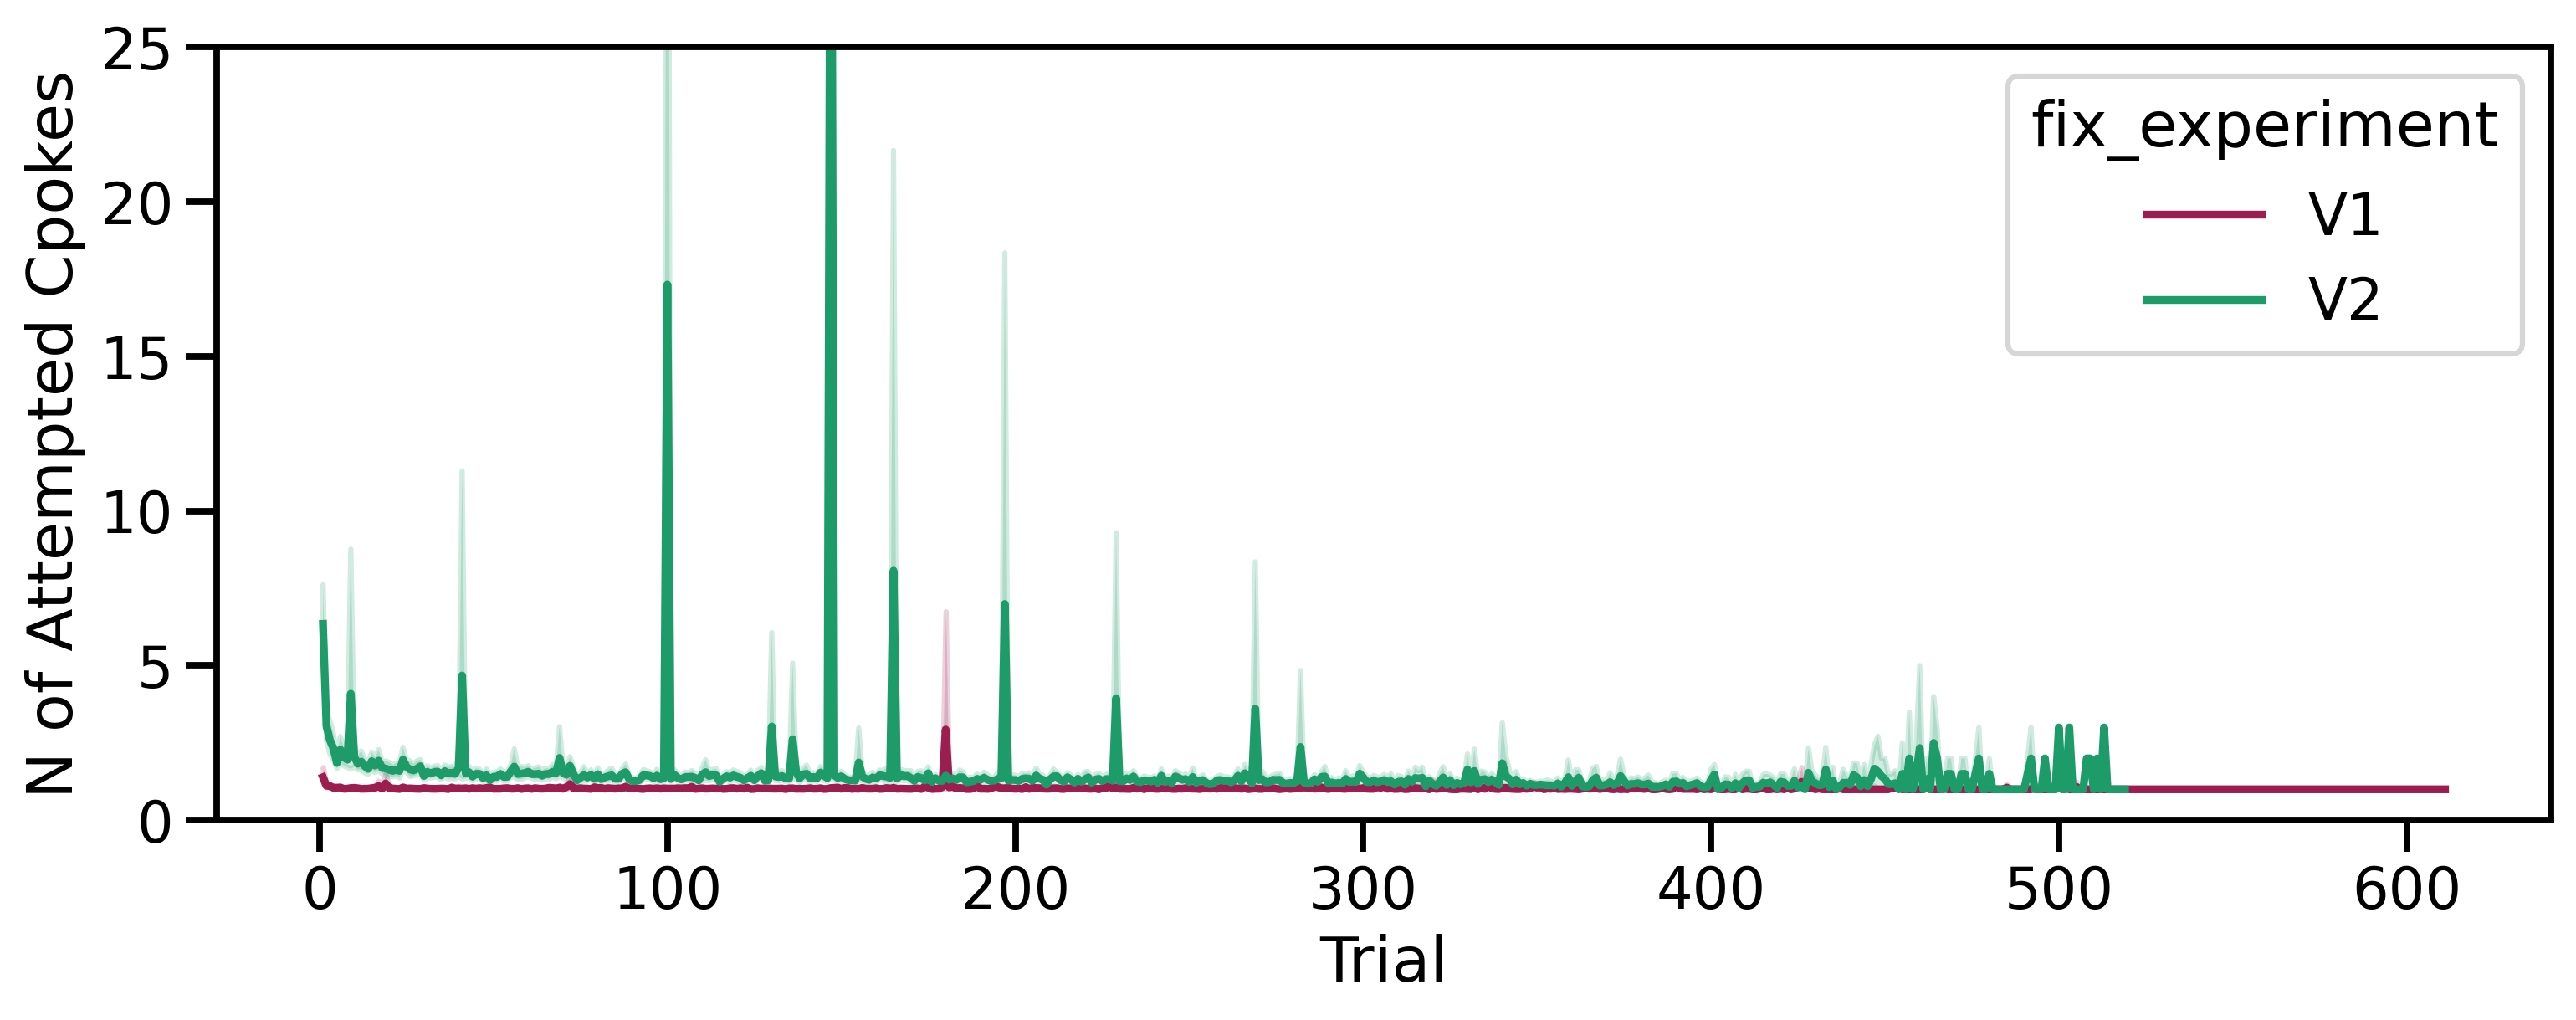

In [15]:
fig, ax = pu.make_fig()

sns.lineplot(
    data=tdf,
    x="trial",
    y="n_settling_ins",
    hue="fix_experiment",
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
)

ax.set(
    ylabel="N of Attempted Cpokes",
    xlabel="Trial",
    ylim=(0, 25),
)

[Text(0, 0.5, 'N of Attempted Cpokes'), Text(0.5, 0, 'Trial')]

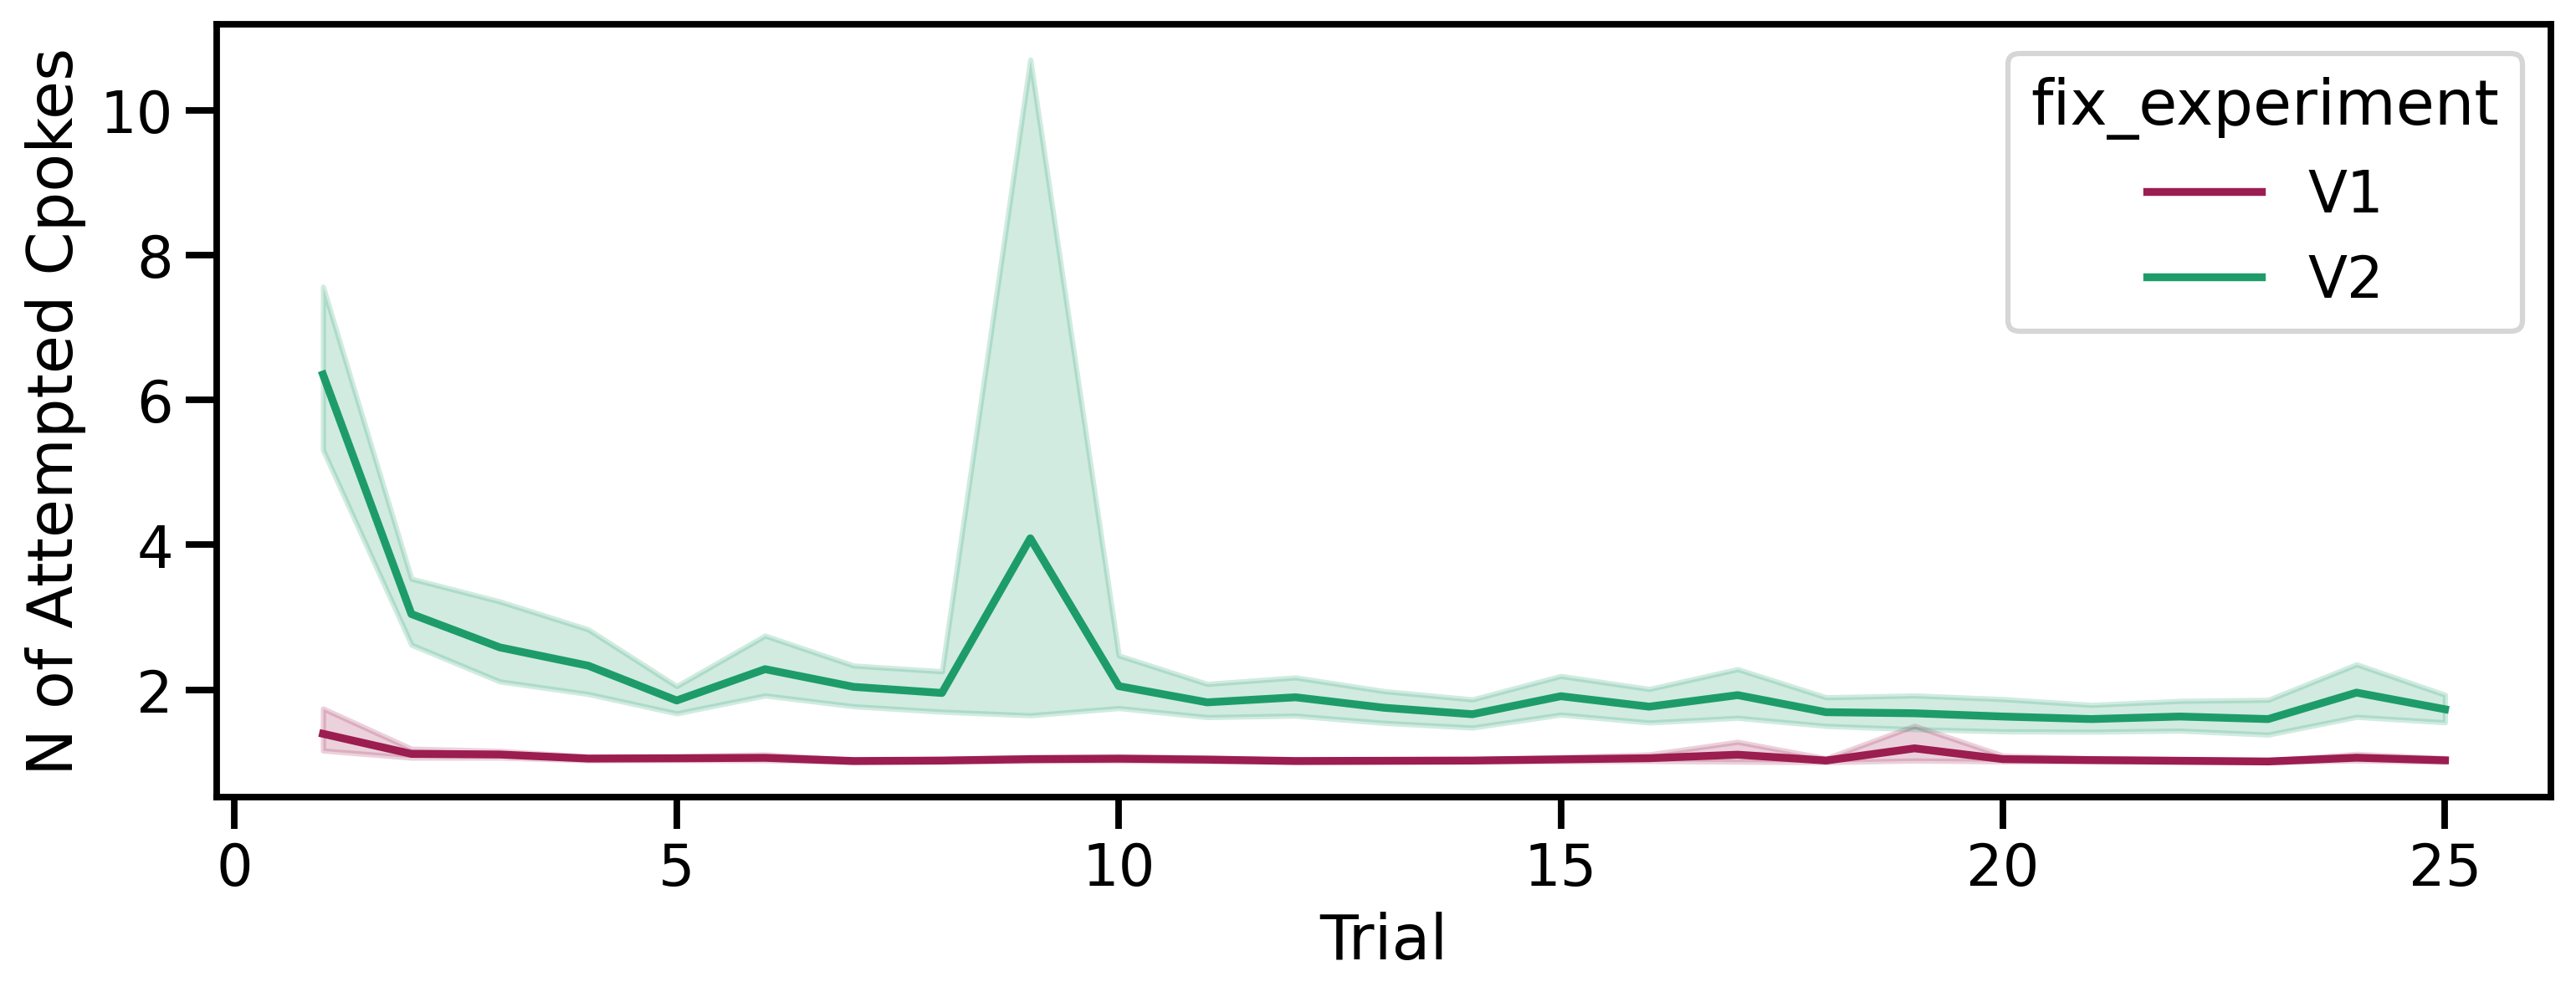

In [16]:
fig, ax = pu.make_fig()

sns.lineplot(
    data=tdf.query("trial < 26"),
    x="trial",
    y="n_settling_ins",
    hue="fix_experiment",
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
)

ax.set(
    ylabel="N of Attempted Cpokes",
    xlabel="Trial",
)

## 3. Over Days in Growth


[Text(0, 0.5, 'Rewarded:Attempted \nCpokes'),
 Text(0.5, 0, 'Days in Cpoke Growth'),
 (0.0, 1.0)]

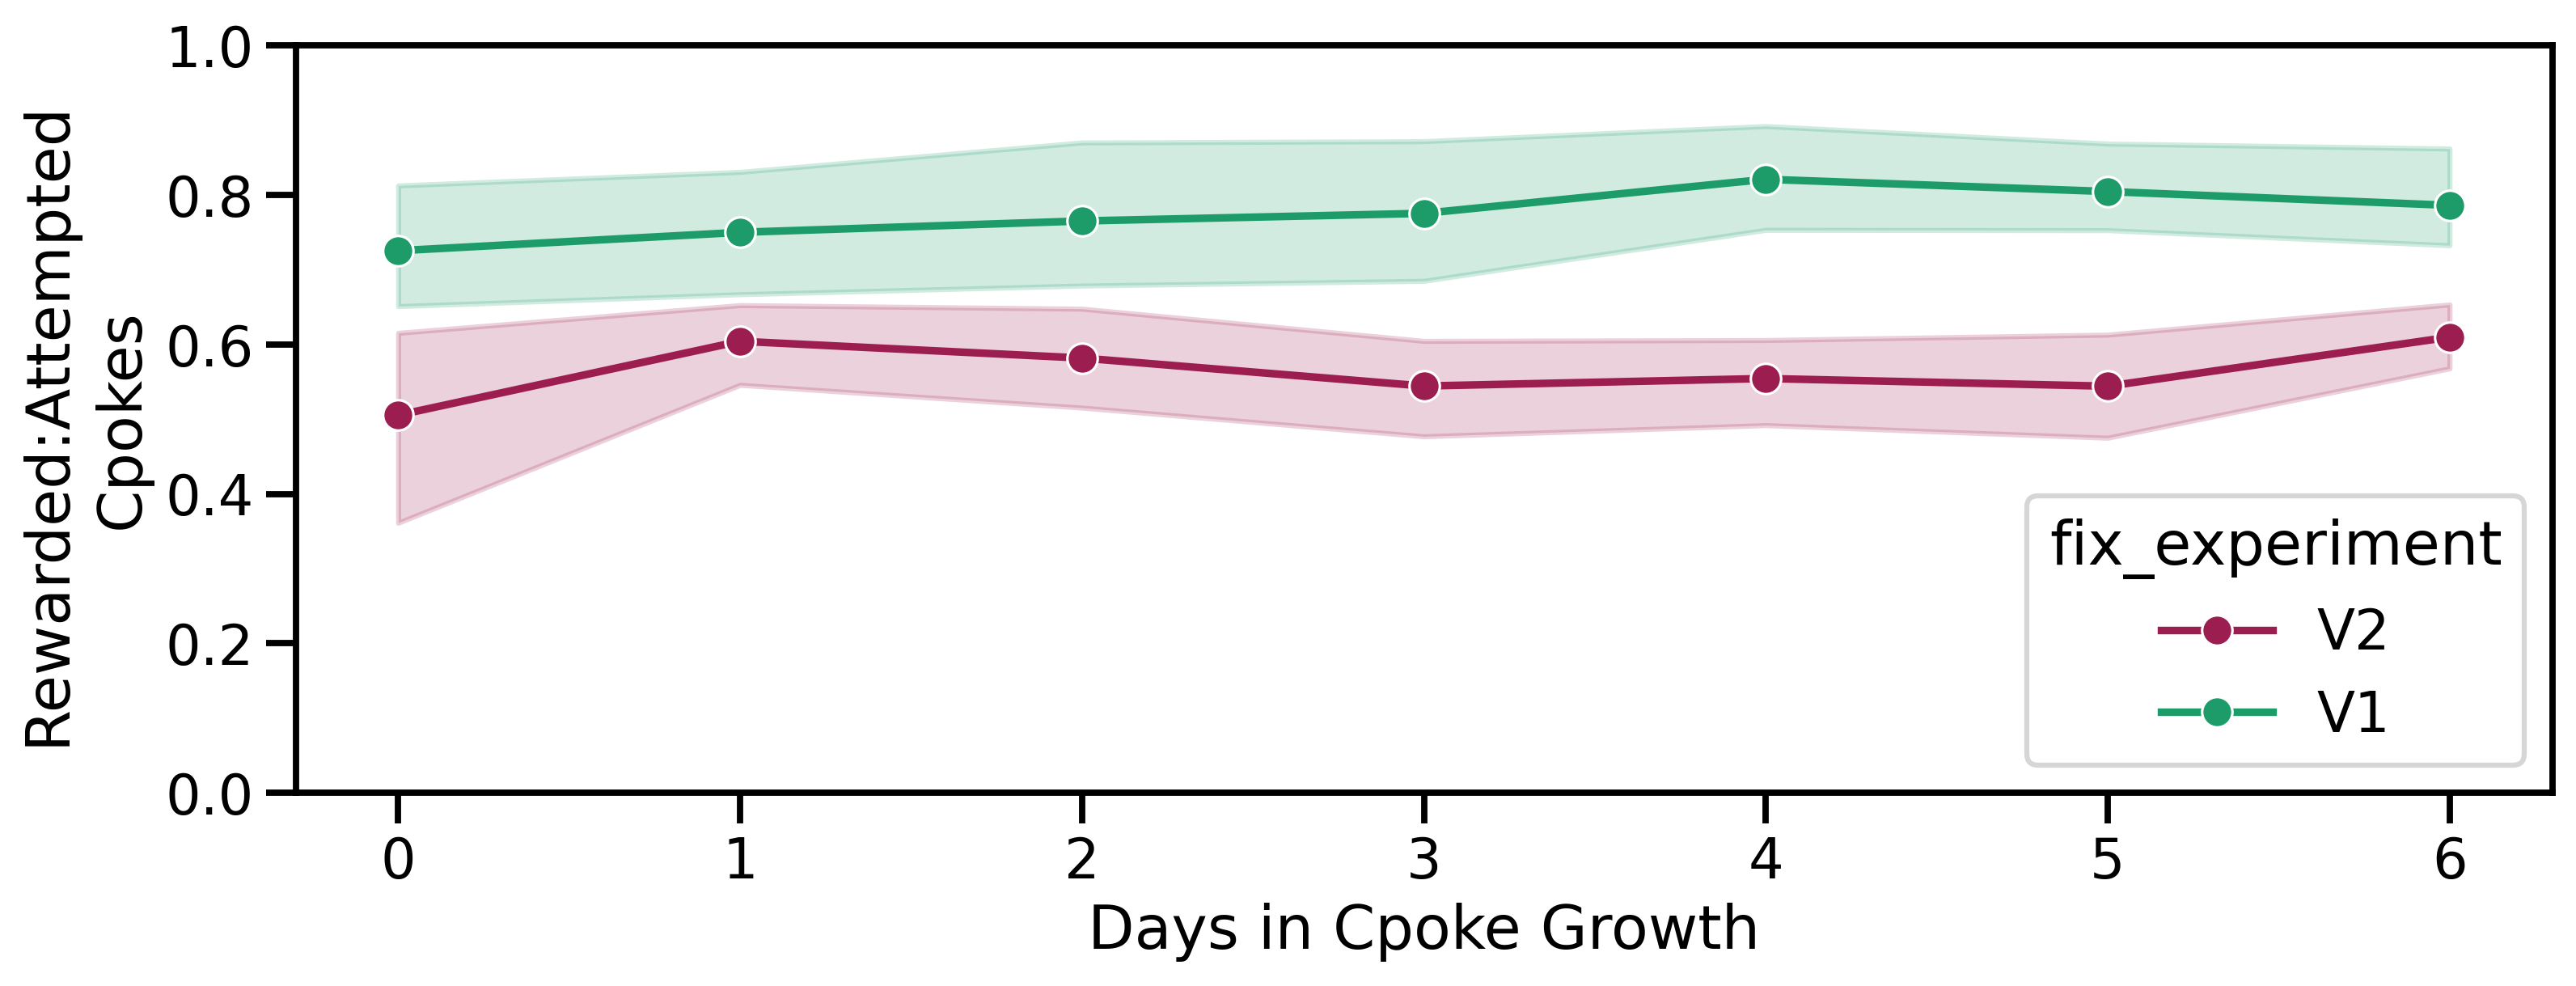

In [28]:
fig, ax = pu.make_fig()

sns.lineplot(
    data=fix_delta_df.query("days_relative_to_stage_5 < 7"),
    x="days_relative_to_stage_5",
    y="ratio_rewarded_to_attempted",
    hue="fix_experiment",
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    marker="o",
)
ax.set(ylabel="Rewarded:Attempted \nCpokes", xlabel="Days in Cpoke Growth", ylim=(0, 1))

## 4. Probe Stages


In [33]:
tdf.stage.max()

np.float64(10.0)

In [34]:
probe_fix_df = viz.FixationGrower.df_preperation.make_fixation_delta_df(
    tdf, relative_stage=9
)
probe_fix_df = probe_fix_df.query("stage == 9 or stage == 10").copy()
probe_fix_df.head(10)

date animal_id  stage  days_relative_to_stage_9 fix_experiment  \
83   2024-08-07      R043    9.0                       0.0             V2   
99   2024-08-08      R043    9.0                       1.0             V2   
114  2024-08-09      R043    9.0                       2.0             V2   
131  2024-08-10      R043    9.0                       3.0             V2   
145  2024-08-11      R041    9.0                       0.0             V2   
146  2024-08-11      R042    9.0                       0.0             V1   
147  2024-08-11      R043    9.0                       4.0             V2   
148  2024-08-11      R045    9.0                       0.0             V2   
153  2024-08-11      R051    9.0                       0.0             V2   
161  2024-08-12      R041    9.0                       1.0             V2   

     max_fixation_dur  trials  n_settling_ins  valid_trials  fixation_delta  
83                2.0     368           384.0         314.0        0.760847  
99                2.0     419           440.0         375.0        0.000000  
114               2.0     392           404.0         360.0        0.000000  
131               2.0     447           466.0         427.0        0.000000  
145               2.0     196           274.0         129.0        0.386268  
146               2.0     432           453.0         348.0       -0.421724  
147               2.0     445           467.0         426.0        0.000000  
148               2.0     369           423.0         302.0        0.118640  
153               2.0     315           346.0         277.0        0.822276  
161               2.0     149           188.0         111.0        0.000000

In [ ]:
### 4.1 N Attempted Cpokes

/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jessbreda/anaconda3/envs/behav_viz/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 32.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


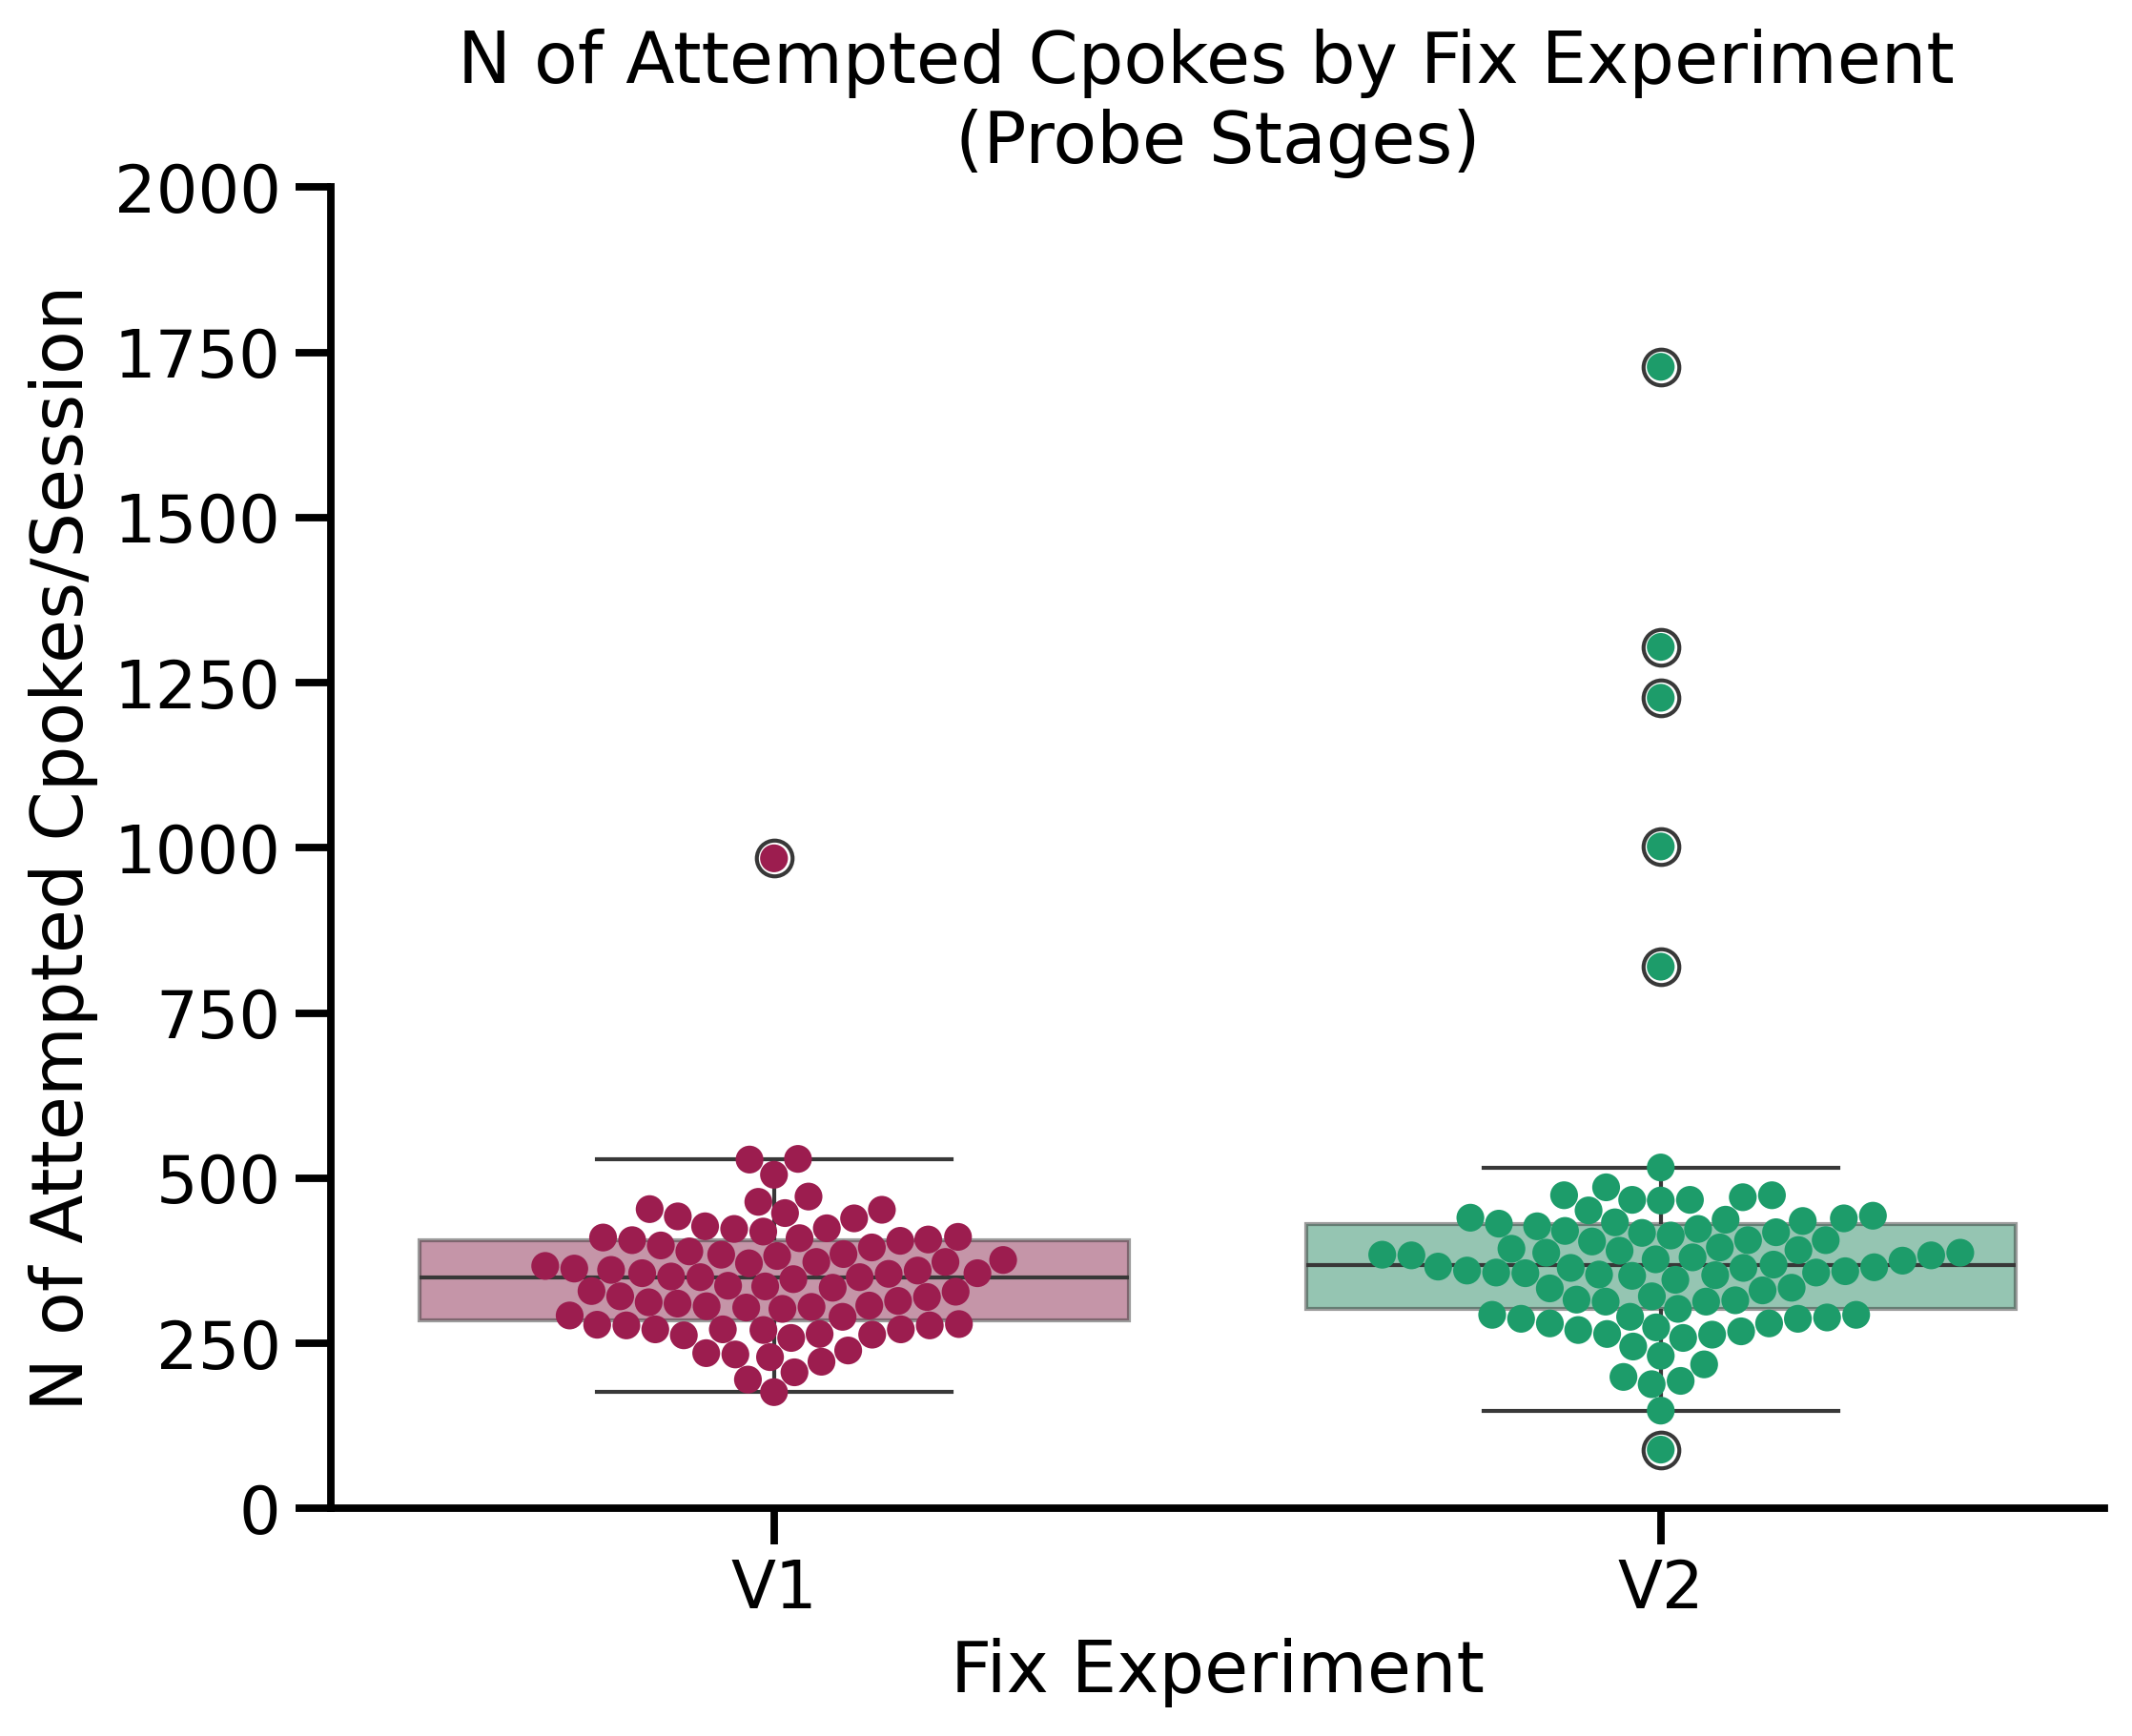

In [37]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# Boxplot
sns.boxplot(
    data=probe_fix_df,
    x="fix_experiment",
    y="n_settling_ins",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    dodge=False,
    ax=ax,
    boxprops=dict(alpha=0.5),
)

# Swarmplot
sns.swarmplot(
    data=probe_fix_df,
    x="fix_experiment",
    y="n_settling_ins",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    size=7,
)

# Set labels, title, and limits
ax.set(
    ylabel="N of Attempted Cpokes/Session",
    xlabel="Fix Experiment",
    title="N of Attempted Cpokes by Fix Experiment \n(Probe Stages)",
    ylim=(0, 2000),
)

# Remove the extra legend if hue was used in both plots
if ax.get_legend():
    ax.legend_.remove()

sns.despine()

plt.show()

In [38]:
probe_fix_df["ratio_rewarded_to_attempted"] = (
    probe_fix_df["valid_trials"] / probe_fix_df["n_settling_ins"]
)

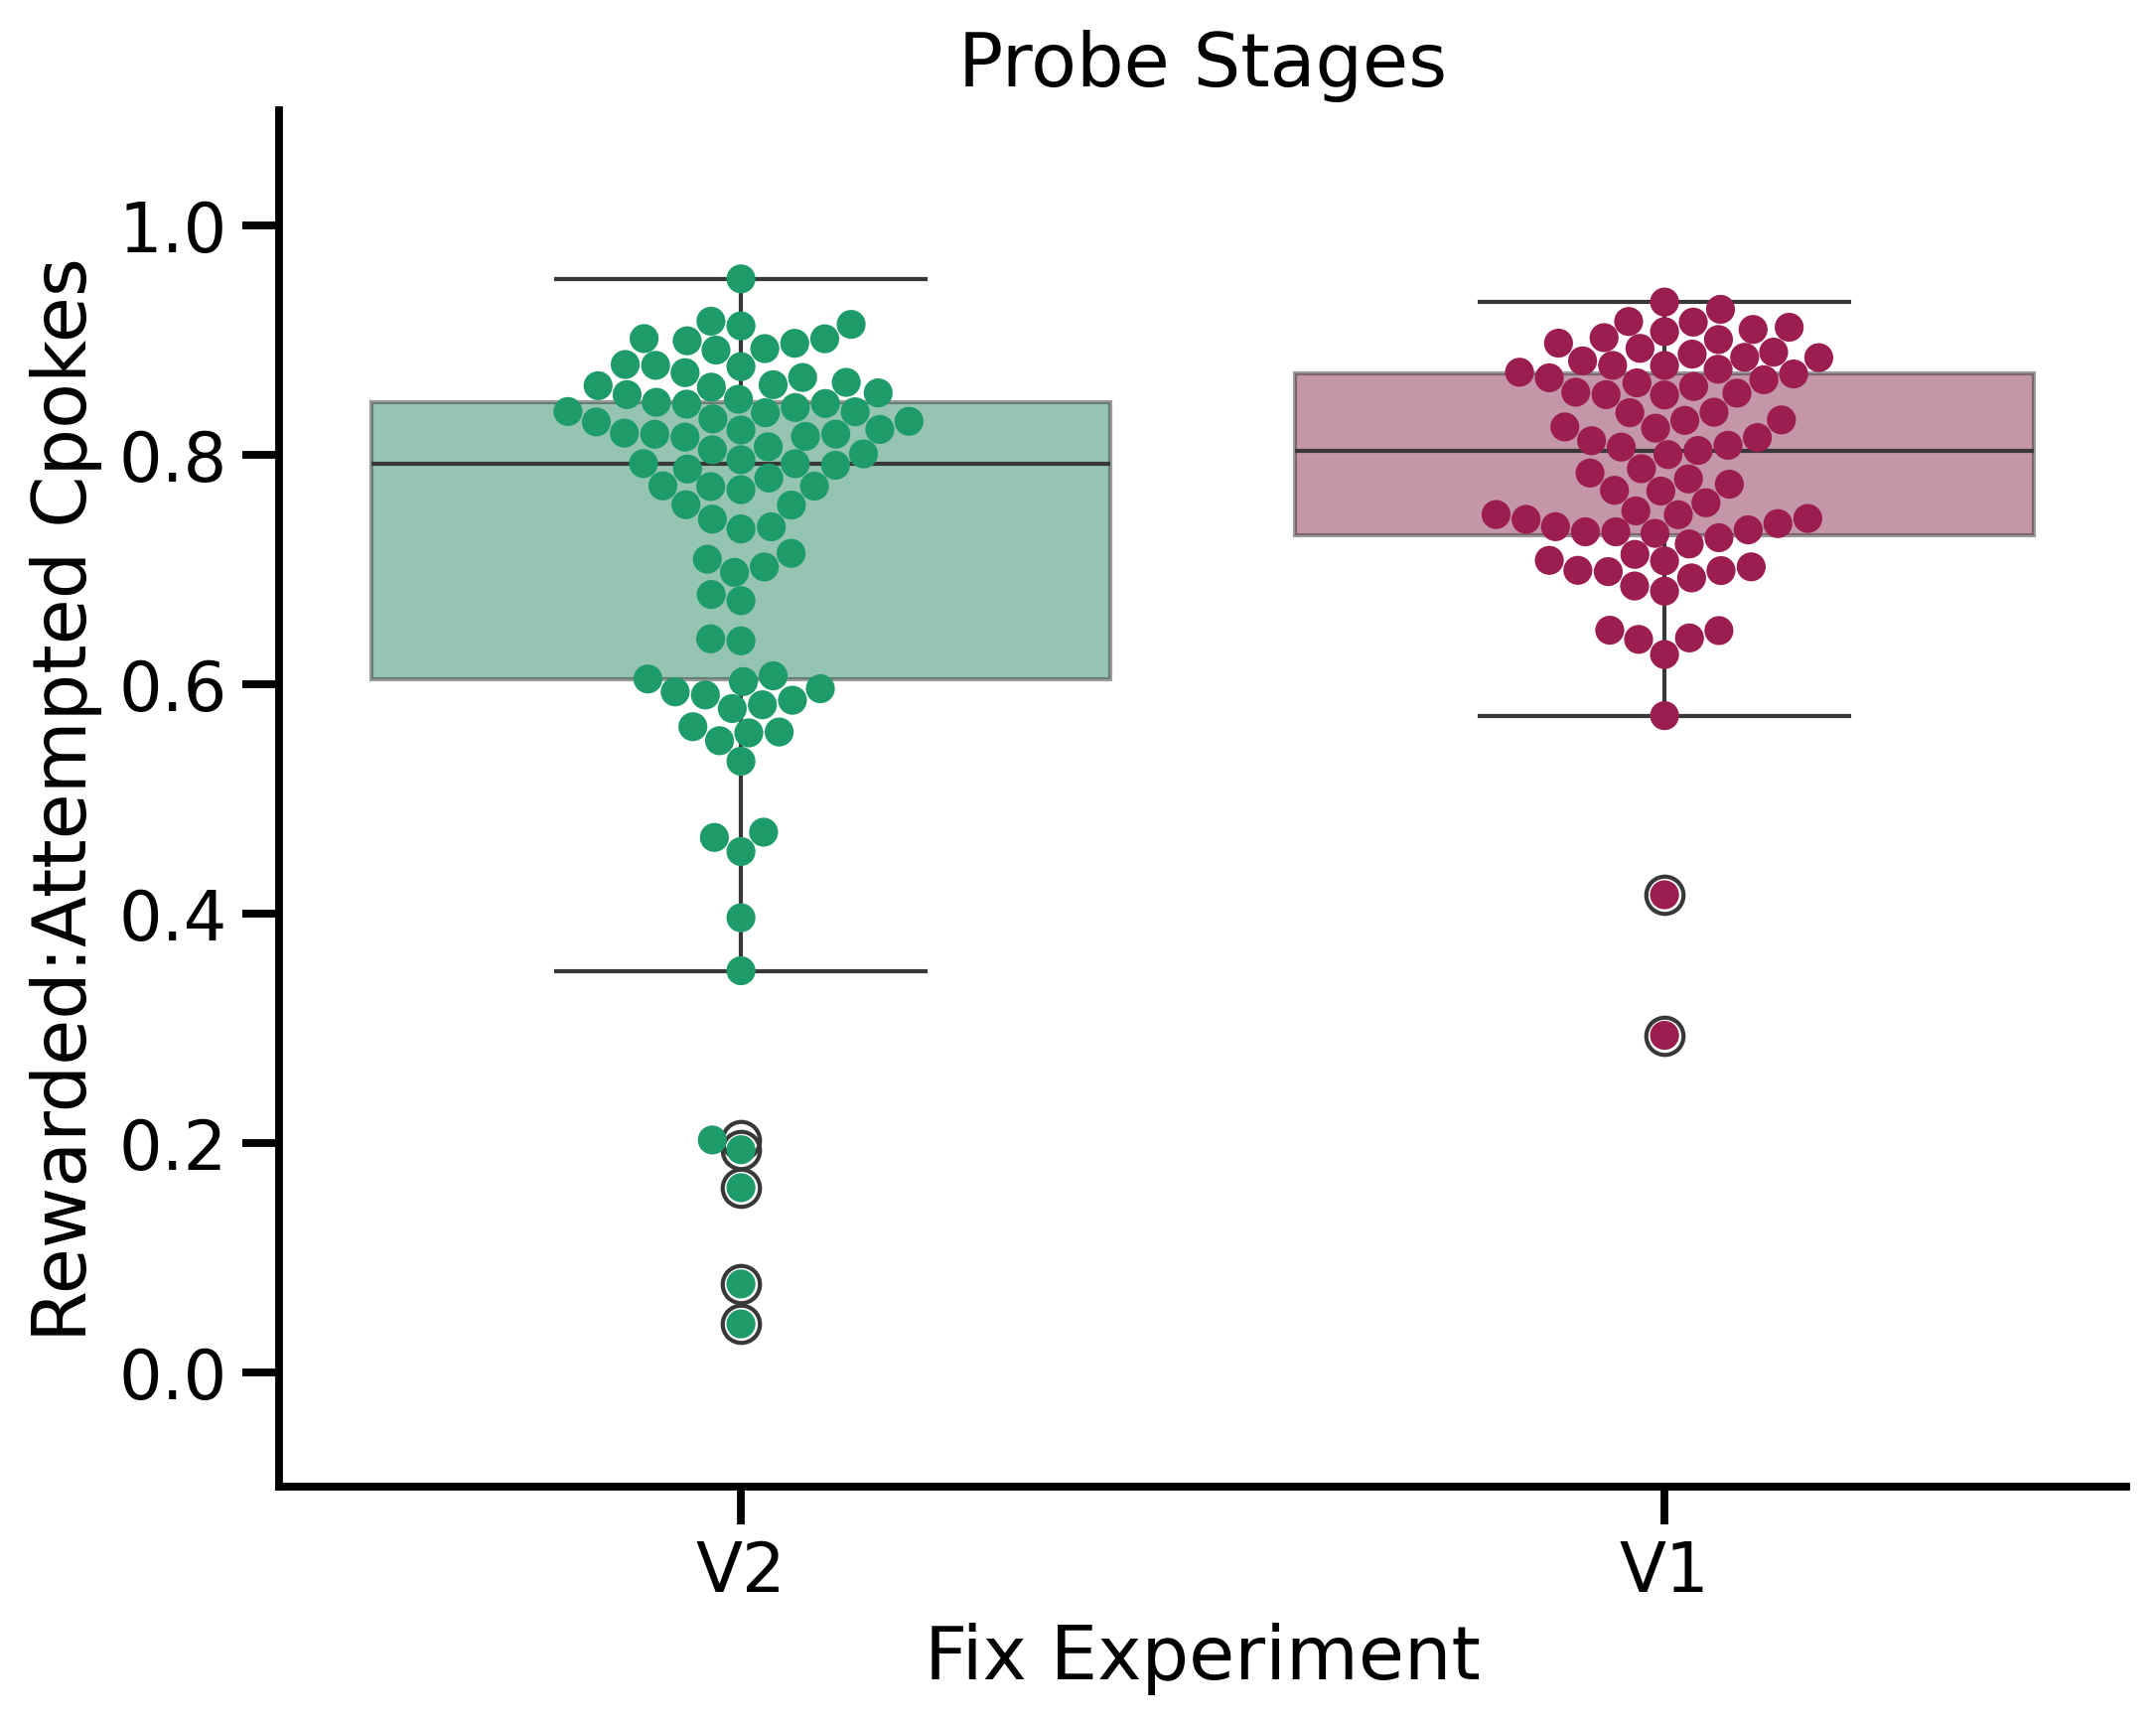

In [40]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

# Boxplot
sns.boxplot(
    data=probe_fix_df,
    x="fix_experiment",
    y="ratio_rewarded_to_attempted",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    dodge=False,
    ax=ax,
    boxprops=dict(alpha=0.5),
)

# Swarmplot
sns.swarmplot(
    data=probe_fix_df,
    x="fix_experiment",
    y="ratio_rewarded_to_attempted",
    hue="fix_experiment",
    hue_order=["V1", "V2"],
    palette=pu.ALPHA_PALLETTE,
    ax=ax,
    size=7,
)

# Set labels, title, and limits
ax.set(
    ylabel="Rewarded:Attempted Cpokes",
    xlabel="Fix Experiment",
    title="Probe Stages",
    ylim=(-0.1, 1.1),
)

# Remove the extra legend if hue was used in both plots
if ax.get_legend():
    ax.legend_.remove()

sns.despine()

plt.show()

In [41]:
# Compute subject-level means (could also use median)
subject_means = (
    probe_fix_df.groupby(["animal_id", "fix_experiment"], as_index=False)[
        "ratio_rewarded_to_attempted"
    ]
    .mean(numeric_only=True)
    .rename(columns={"ratio_rewarded_to_attempted": "ratio_mean"})
)

subject_means.head()

animal_id fix_experiment  ratio_mean
0      R040             V1    0.662623
1      R041             V2    0.595093
2      R042             V1    0.830592
3      R043             V2    0.894687
4      R045             V2    0.783474

In [42]:
import scipy.stats as stats

# Separate out the two groups
group_v1 = subject_means.loc[subject_means["fix_experiment"] == "V1", "ratio_mean"]
group_v2 = subject_means.loc[subject_means["fix_experiment"] == "V2", "ratio_mean"]

# Shapiro-Wilk
sw_v1 = stats.shapiro(group_v1)
sw_v2 = stats.shapiro(group_v2)
print("Shapiro-Wilk V1:", sw_v1)
print("Shapiro-Wilk V2:", sw_v2)

# (Small p-value means likely not normally distributed; large p-value means data are not inconsistent with normal.)

Shapiro-Wilk V1: ShapiroResult(statistic=np.float64(0.7934595027364527), pvalue=np.float64(0.024353556972501078))
Shapiro-Wilk V2: ShapiroResult(statistic=np.float64(0.9100983947823621), pvalue=np.float64(0.3165638077274855))


In [43]:
# Independent samples t-test
ttest_res = stats.ttest_ind(group_v1, group_v2, equal_var=False)
# using Welch's t-test by setting equal_var=False is more robust.

print("T-test (Welch) results:")
print(ttest_res)

T-test (Welch) results:
TtestResult(statistic=np.float64(1.1290710058001596), pvalue=np.float64(0.28072101076870193), df=np.float64(12.119621544141047))


In [45]:
import statsmodels.formula.api as smf

# For a linear mixed-effects model, you can do:
model = smf.mixedlm(
    formula="ratio_rewarded_to_attempted ~ fix_experiment",  # fixed effects
    data=probe_fix_df,
    groups=probe_fix_df["animal_id"],  # random intercept for each animal
)
mixed_lm = model.fit()
print(mixed_lm.summary())

                  Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ratio_rewarded_to_attempted
No. Observations: 168     Method:             REML                       
No. Groups:       17      Scale:              0.0130                     
Min. group size:  9       Log-Likelihood:     101.6663                   
Max. group size:  10      Converged:          Yes                        
Mean group size:  9.9                                                    
---------------------------------------------------------------------------
                       Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
---------------------------------------------------------------------------
Intercept               0.785      0.044   17.719   0.000    0.698    0.872
fix_experiment[T.V2]   -0.066      0.061   -1.088   0.277   -0.186    0.053
Group Var               0.014      0.053                                   

